In [1]:
import os
import sys
import logging
import datetime
import dill as pickle
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sys.path.insert(1, r'methods')

from data_methods import getData, standardize
# from dimensionality_reduction import reduce_dimensionality,reduce_with
# from beamSearch import EMM, as_string
# from adjPysubgroup import adjustedBestFirstSearch, adjustedDFS, adjustedApriori
from qualityMeasures import calc_result_bs, calc_result_ps
from interpretabilityMeasures import Feature_Correlation_Scores, DBI_beam, DBI_ps

In [3]:
# Loading the object using dill
sd_results_path = r'C:\Users\20193723\OneDrive - TU Eindhoven\Documents\Research Topics in Data Mining\Interpretable-Subgroup-Discovery\sd_results'
file_name = 'Ionosphere-data-reductions.pkl'
with open(os.path.join(sd_results_path,file_name), 'rb') as f:
    dfs_dict =pickle.load(f)

In [4]:
# datasets = []
# for dataset in dataset:
#     file_name = '-data-reductions.pkl'
#     en_methods = ['vanilla', 'auto_encoder', 'PCA', 'SPCA']
#     for en_method in en_methods:
#         fcs, fcss = Feature_Correlation_Scores(loaded_dict['vanilla'], loaded_dict[en_method])
#         print(en_method, "    ", "\n FCS: ", round(fcs, 2), "    FCSS", round(fcss, 2))

In [15]:
en_methods = ['auto_encoder', 'PCA', 'SPCA']
for en_method in en_methods:
    fcs, fcss = Feature_Correlation_Scores(dfs_dict['vanilla'], dfs_dict[en_method])
    print(en_method, "    ", "\n FCS: ", round(fcs, 2), "    FCSS", round(fcss, 2))

auto_encoder      
 FCS:  0.59     FCSS 0.12
PCA      
 FCS:  0.65     FCSS 0.14
SPCA      
 FCS:  0.72     FCSS 0.19


In [3]:
sd_results_path = r'C:\Users\20193723\OneDrive - TU Eindhoven\Documents\Research Topics in Data Mining\Interpretable-Subgroup-Discovery\results_renamed'
file_name = 'Soybean-results.pkl'
with open(os.path.join(sd_results_path,file_name), 'rb') as f:
    results_dict =pickle.load(f)

In [16]:
bfs = results_dict['vanilla']['Best-First Search']['results_org']
bfs_en = results_dict['PCA']['Best-First Search']['results_org']

In [17]:
vanilla = results_dict['auto_encoder']['Beam Search']['results_org']

In [18]:
subgroups_n = [i for i in vanilla.get_values()]

In [21]:
df = dfs_dict['auto_encoder']

In [22]:
df[df.eval(str(subgroups_n[1][1]).replace("', '", ' and ').replace("['", '').replace("']", ''))]

,target,cat1,cat2,cat3,cat4,cat5
36,0,2.670305,-0.637574,-0.008092,0.009340,1.814592
398,0,2.418383,-0.990442,-0.221028,0.080094,1.067282
513,0,3.184095,-1.293544,-0.379369,0.241604,2.213722
588,0,2.885142,-0.685566,-0.218985,0.358690,1.813227
632,0,-0.679030,-0.816299,-0.315998,0.162555,0.262455
...,...,...,...,...,...,...
8118,1,1.369584,-0.718166,1.165795,0.577131,-0.751188
8119,0,-0.775223,1.175854,-0.006725,2.146407,1.737964
8121,0,-1.062942,0.916443,0.504892,2.226397,2.688123
8122,1,1.088449,-0.264263,0.256847,1.536109,0.332227


In [47]:
str(subgroups_n[1][1])

"['cat2 > -0.8140837550163269', 'cat2 <= -0.17320257425308228']"

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
original_df = dfs_dict['vanilla']
features = [i for i in original_df.columns if i !='target']

In [6]:
OHenc = OneHotEncoder() 
dataCategorical = OHenc.fit_transform(original_df[features]).toarray()
original_encoded = pd.DataFrame(dataCategorical)

In [31]:
subgroups = results_dict['auto_encoder']['Best-First Search']['results_org']
subgroups
# subgroups[subgroups['relative_size_sg'] >= 0.5]

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,0.060476,cat5<304.81,84,420,62,183,336,0.200000,0.800000,0.338798,0.661202,0.738095,0.360119,0.435714,1.693989
1,0.043810,cat4>=100.28,84,420,55,183,336,0.200000,0.800000,0.300546,0.699454,0.654762,0.380952,0.435714,1.502732
2,0.039048,cat2>=79.74,84,420,53,183,336,0.200000,0.800000,0.289617,0.710383,0.630952,0.386905,0.435714,1.448087
3,0.036667,cat1>=210.55,84,420,52,183,336,0.200000,0.800000,0.284153,0.715847,0.619048,0.389881,0.435714,1.420765
4,0.036037,cat2>=79.74 AND cat5<304.81,41,420,33,183,379,0.097619,0.902381,0.180328,0.819672,0.804878,0.395778,0.435714,1.847261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000561,cat4: [29.65:100.28[ AND cat5>=404.84,27,420,12,183,393,0.064286,0.935714,0.065574,0.934426,0.444444,0.435115,0.435714,1.020036
96,0.000493,cat1: [92.89:142.86[ AND cat4: [-41.07:-8.42[,11,420,5,183,409,0.026190,0.973810,0.027322,0.972678,0.454545,0.435208,0.435714,1.043219
97,0.000374,cat1: [92.89:142.86[ AND cat4>=100.28,18,420,8,183,402,0.042857,0.957143,0.043716,0.956284,0.444444,0.435323,0.435714,1.020036
98,0.000374,cat2<-21.22 AND cat4: [-41.07:-8.42[,18,420,8,183,402,0.042857,0.957143,0.043716,0.956284,0.444444,0.435323,0.435714,1.020036


In [23]:
sd_results_path = r'C:\Users\20193723\OneDrive - TU Eindhoven\Documents\Research Topics in Data Mining\Interpretable-Subgroup-Discovery\results_renamed'
dct_datasets = ['Arrhythmia'] # to test <- Remove later
categorical_datasets = ['Mushroom', 'Adult']
for dataset in dct_datasets:
    #Load dataframes and results
    df_file_name = dataset+'-data-reductions.pkl'
    results_file_name = dataset+'-results.pkl'
    with open(os.path.join(sd_results_path,df_file_name), 'rb') as f:
        dfs_dict =pickle.load(f)
    with open(os.path.join(sd_results_path,results_file_name), 'rb') as f:
        results_dict =pickle.load(f)
    #One-hot encode vanilla dataframe if categorical
    original_df = dfs_dict['vanilla']
    if dataset in categorical_datasets:
       features = [i for i in original_df.columns if i !='target']
       OHenc = OneHotEncoder() 
       dataCategorical = OHenc.fit_transform(original_df[features]).toarray()
       original_df = pd.DataFrame(dataCategorical)
    #Compute and print scores and index
    print(dataset, ":    \n")
    en_methods = ['auto_encoder', 'PCA', 'SPCA']
    ps_sd_methods = ['Apriori', 'Best-First Search', 'Depth-First Search']
    for en_method in en_methods:
        fcs, fcss = Feature_Correlation_Scores(original_df, dfs_dict[en_method])
        print(en_method, ":    ", "\n   FCS: ", round(fcs, 2), "    FCSS", round(fcss, 2))
        for sd_method in ps_sd_methods:
            dbi = DBI_ps(results_dict[en_method][sd_method]['results_org'], dfs_dict[en_method])
            print("DBI "+sd_method+": ", dbi)
        subgroups_beam = [i for i in results_dict[en_method]['Beam Search']['results_org'].get_values()]
        dbi = DBI_beam(subgroups_beam, dfs_dict[en_method])
        print("DBI Beam Search: ", dbi, "\n")
    print("\n\n")

Arrhythmia :    

auto_encoder :     
   FCS:  0.7     FCSS 0.31
DBI Apriori:  176.04204264686868
DBI Best-First Search:  185.5963747531536
DBI Depth-First Search:  184.90905777288822
DBI Beam Search:  1.2806238656859177e+18 

PCA :     
   FCS:  0.76     FCSS 0.25
DBI Apriori:  9.128979268086724
DBI Best-First Search:  8.782523375745633


UndefinedVariableError: name 'Dataset' is not defined

In [3]:
sd_results_path = r'C:\Users\20193723\OneDrive - TU Eindhoven\Documents\Research Topics in Data Mining\Interpretable-Subgroup-Discovery\results_renamed'
dct_datasets = ['Ionosphere', 'Arrhythmia', 'Indoor', 'Soybean', 'Mushroom', 'Adult'] 
categorical_datasets = ['Mushroom', 'Adult']
for dataset in dct_datasets:
    #Load dataframes and results
    df_file_name = dataset+'-data-reductions.pkl'
    results_file_name = dataset+'-results.pkl'
    with open(os.path.join(sd_results_path,df_file_name), 'rb') as f:
        dfs_dict =pickle.load(f)
    with open(os.path.join(sd_results_path,results_file_name), 'rb') as f:
        results_dict =pickle.load(f)
    #One-hot encode vanilla dataframe if categorical
    original_df = dfs_dict['vanilla']
    if dataset in categorical_datasets:
       features = [i for i in original_df.columns if i !='target']
       OHenc = OneHotEncoder() 
       dataCategorical = OHenc.fit_transform(original_df[features]).toarray()
       original_df = pd.DataFrame(dataCategorical)
    #Compute and print scores and index
    print(dataset, ":    \n")
    en_methods = ['auto_encoder', 'PCA', 'SPCA']
    ps_sd_methods = ['Apriori', 'Best-First Search', 'Depth-First Search']
    for en_method in en_methods:
        fcs, fcss = Feature_Correlation_Scores(original_df, dfs_dict[en_method])
        print(en_method, ":    ", "\n   FCS: ", round(fcs, 2), "    FCSS", round(fcss, 2))
        for sd_method in ps_sd_methods:
            dbi = DBI_ps(results_dict[en_method][sd_method]['results_org'], dfs_dict[en_method])
            print("DBI "+sd_method+": ", dbi)
        subgroups_beam = [i for i in results_dict[en_method]['Beam Search']['results_org'].get_values()]
        dbi = DBI_beam(subgroups_beam, dfs_dict[en_method])
        print("DBI Beam Search: ", dbi, "\n")
    print("\n\n")

Ionosphere :    

auto_encoder :     
   FCS:  0.59     FCSS 0.12
DBI Apriori:  4.646945864519912
DBI Best-First Search:  5.07139943290663


KeyboardInterrupt: 

In [40]:
output_dataframes['Beam Search']

,coverage,coverage_prop,avg_size,max_wracc,avg_wracc,coverage_auto_encoder,coverage_pop_auto_encoder,added_auto_encoder,added_prop_auto_encoder,removed_auto_encoder,...,avg_wracc_PCA,coverage_SPCA,coverage_pop_SPCA,added_SPCA,added_prop_SPCA,removed_SPCA,removed_prop_SPCA,avg_size_SPCA,max_wracc_SPCA,avg_wracc_SPCA
Ionosphere,301,0.857550,184.63,0.140770,0.131645,263,0.749288,15,0.042735,53,...,0.138172,270,0.769231,12,0.034188,43,0.122507,187.33,0.117978,0.104207
Arrhythmia,187,0.445238,146.36,0.082789,0.080854,221,0.526190,119,0.283333,85,...,0.061799,210,0.500000,68,0.161905,45,0.107143,104.12,0.090476,0.066294
Indoor,5553,0.263826,4235.05,0.108034,0.107908,13094,0.622102,7574,0.359844,33,...,0.208759,14450,0.686526,8898,0.422748,1,0.000048,7798.87,0.214514,0.179918
Soybean,266,1.000000,266.00,0.000000,0.000000,169,0.635338,0,0.000000,97,...,0.163007,152,0.571429,0,0.000000,114,0.428571,91.01,0.203742,0.169103
Mushroom,4596,0.565731,4018.08,0.242026,0.226013,4429,0.545175,1218,0.149926,1385,...,0.160968,4485,0.552068,1046,0.128754,1157,0.142418,2844.20,0.194271,0.167028
Adult,22379,0.458192,20846.47,0.066375,0.065454,12211,0.250010,5659,0.115863,15827,...,0.063452,25200,0.515949,7246,0.148356,4425,0.090598,18344.98,0.064622,0.062962


Beam Search :    


Ionosphere :    

coverage autoencoding: 263, (0.7492877492877493)
coverage no auto encoding: 301, (0.8575498575498576)
# rows added in subgroups: 15 (0.042735042735042736)
# rows no longer in subgroups: 53, (0.150997150997151)
average subgroup size auto encoded: 162.5
average subgroup size no auto encoding: 184.63
WRACC auto encoding: Max: 0.11220688143765066, Mean: 0.09886989553656217
WRACC no auto encoding: Max: 0.1407699612827818, Mean: 0.13164511651691138


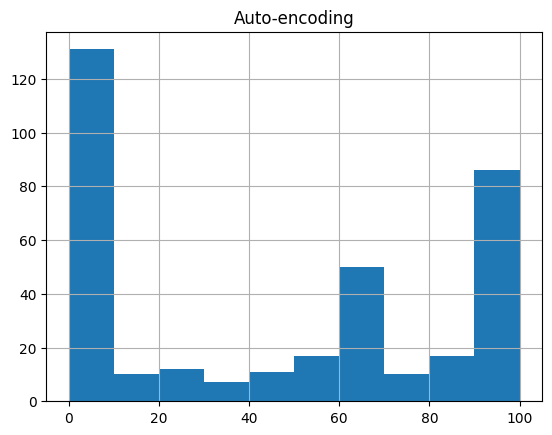

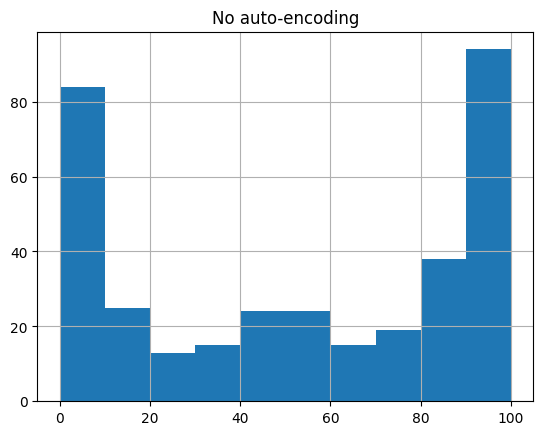

auto_encoder
coverage autoencoding: 263, (0.7492877492877493)
coverage no auto encoding: 301, (0.8575498575498576)
# rows added in subgroups: 15 (0.042735042735042736)
# rows no longer in subgroups: 53, (0.150997150997151)
average subgroup size auto encoded: 162.5
average subgroup size no auto encoding: 184.63
WRACC auto encoding: Max: 0.11220688143765066, Mean: 0.09886989553656217
WRACC no auto encoding: Max: 0.1407699612827818, Mean: 0.13164511651691138


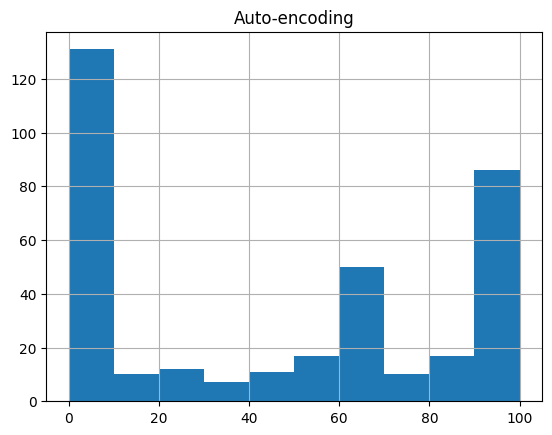

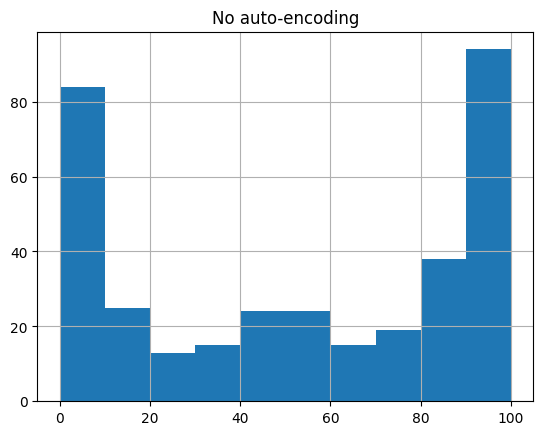

PCA
coverage autoencoding: 265, (0.7549857549857549)
coverage no auto encoding: 301, (0.8575498575498576)
# rows added in subgroups: 6 (0.017094017094017096)
# rows no longer in subgroups: 42, (0.11965811965811966)
average subgroup size auto encoded: 197.67
average subgroup size no auto encoding: 184.63
WRACC auto encoding: Max: 0.1538461538461538, Mean: 0.13817225509533196
WRACC no auto encoding: Max: 0.1407699612827818, Mean: 0.13164511651691138


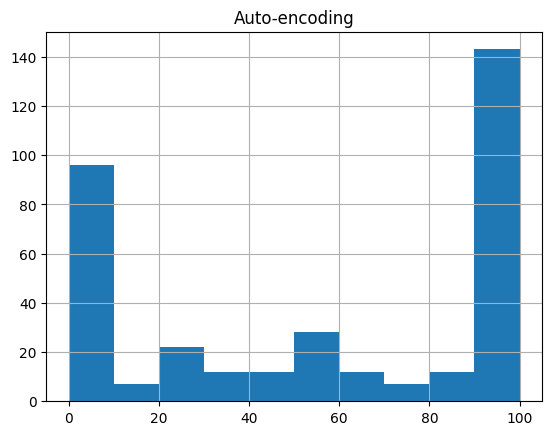

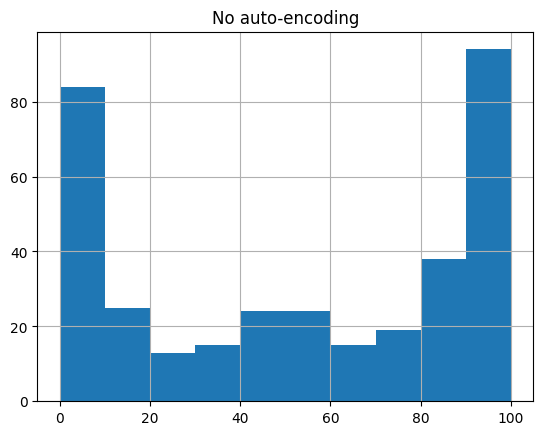

SPCA
coverage autoencoding: 270, (0.7692307692307693)
coverage no auto encoding: 301, (0.8575498575498576)
# rows added in subgroups: 12 (0.03418803418803419)
# rows no longer in subgroups: 43, (0.1225071225071225)
average subgroup size auto encoded: 187.33
average subgroup size no auto encoding: 184.63
WRACC auto encoding: Max: 0.11797793849075894, Mean: 0.10420702754036086
WRACC no auto encoding: Max: 0.1407699612827818, Mean: 0.13164511651691138


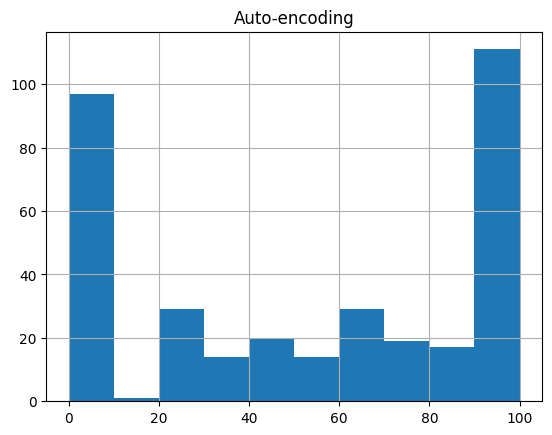

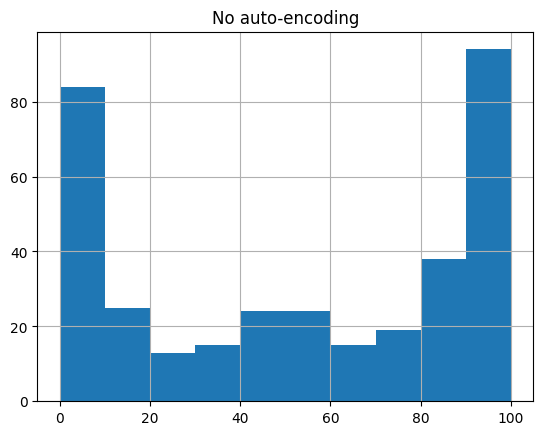

Arrhythmia :    

coverage autoencoding: 221, (0.5261904761904762)
coverage no auto encoding: 187, (0.4452380952380952)
# rows added in subgroups: 119 (0.2833333333333333)
# rows no longer in subgroups: 85, (0.20238095238095238)
average subgroup size auto encoded: 81.94
average subgroup size no auto encoding: 146.36
WRACC auto encoding: Max: 0.06547619047619048, Mean: 0.05392278911564624
WRACC no auto encoding: Max: 0.0827891156462585, Mean: 0.08085442176870748


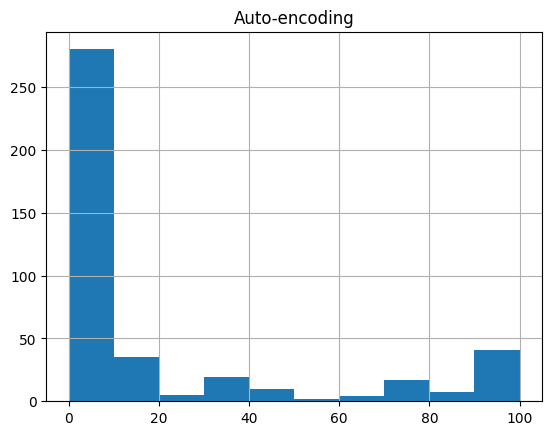

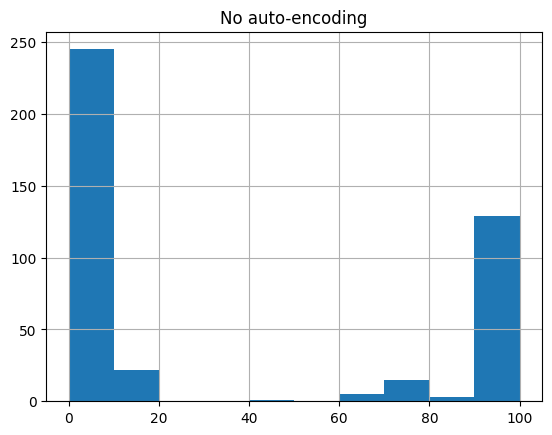

auto_encoder
coverage autoencoding: 221, (0.5261904761904762)
coverage no auto encoding: 187, (0.4452380952380952)
# rows added in subgroups: 119 (0.2833333333333333)
# rows no longer in subgroups: 85, (0.20238095238095238)
average subgroup size auto encoded: 81.94
average subgroup size no auto encoding: 146.36
WRACC auto encoding: Max: 0.06547619047619048, Mean: 0.05392278911564624
WRACC no auto encoding: Max: 0.0827891156462585, Mean: 0.08085442176870748


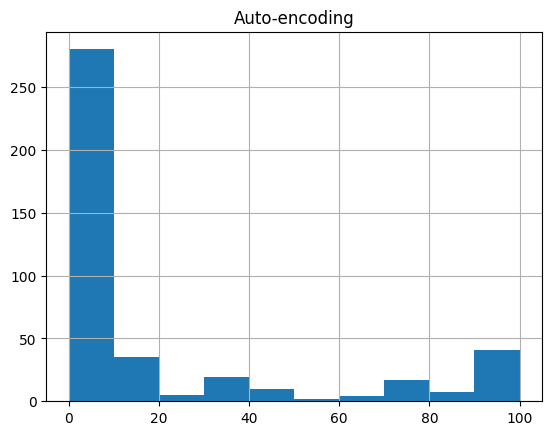

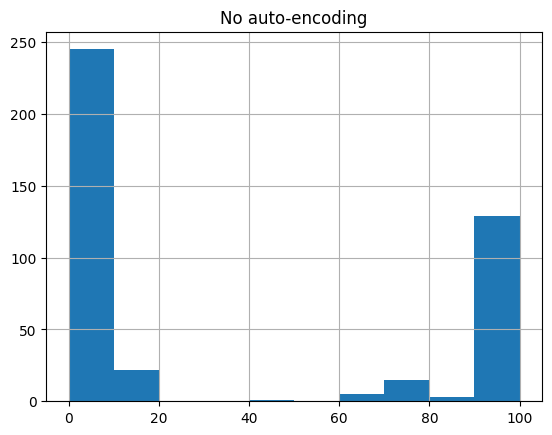

PCA
coverage autoencoding: 253, (0.6023809523809524)
coverage no auto encoding: 187, (0.4452380952380952)
# rows added in subgroups: 96 (0.22857142857142856)
# rows no longer in subgroups: 30, (0.07142857142857142)
average subgroup size auto encoded: 124.22
average subgroup size no auto encoding: 146.36
WRACC auto encoding: Max: 0.06666666666666665, Mean: 0.06179897959183672
WRACC no auto encoding: Max: 0.0827891156462585, Mean: 0.08085442176870748


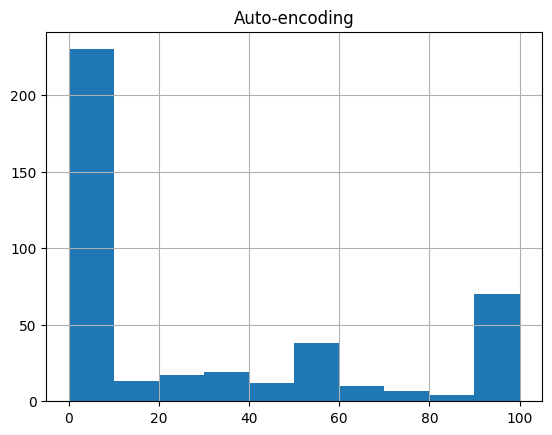

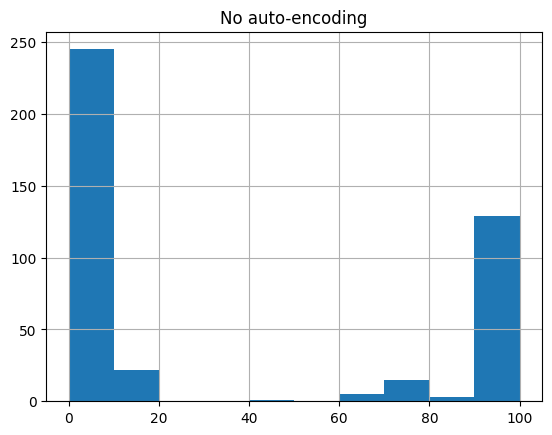

SPCA
coverage autoencoding: 210, (0.5)
coverage no auto encoding: 187, (0.4452380952380952)
# rows added in subgroups: 68 (0.1619047619047619)
# rows no longer in subgroups: 45, (0.10714285714285714)
average subgroup size auto encoded: 104.12
average subgroup size no auto encoding: 146.36
WRACC auto encoding: Max: 0.09047619047619049, Mean: 0.06629387755102042
WRACC no auto encoding: Max: 0.0827891156462585, Mean: 0.08085442176870748


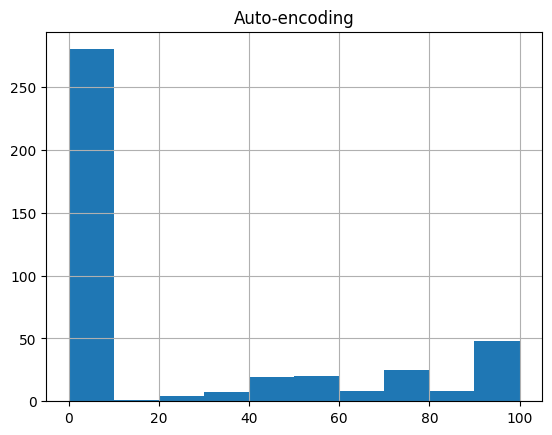

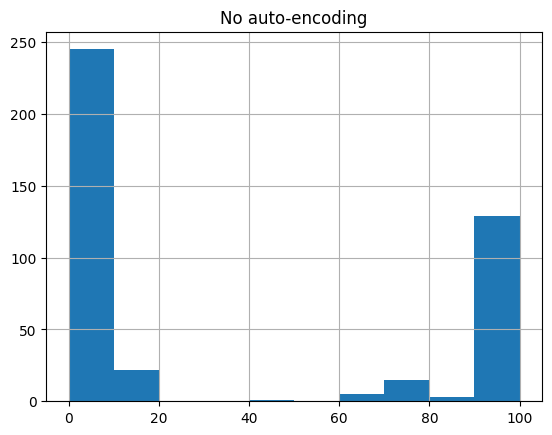

Indoor :    

coverage autoencoding: 13094, (0.6221018624097301)
coverage no auto encoding: 5553, (0.2638255416191562)
# rows added in subgroups: 7574 (0.3598441657164576)
# rows no longer in subgroups: 33, (0.0015678449258836945)
average subgroup size auto encoded: 9921.35
average subgroup size no auto encoding: 4235.05
WRACC auto encoding: Max: 0.206845412870345, Mean: 0.19404694122976912
WRACC no auto encoding: Max: 0.10803418181114251, Mean: 0.10790805699982998


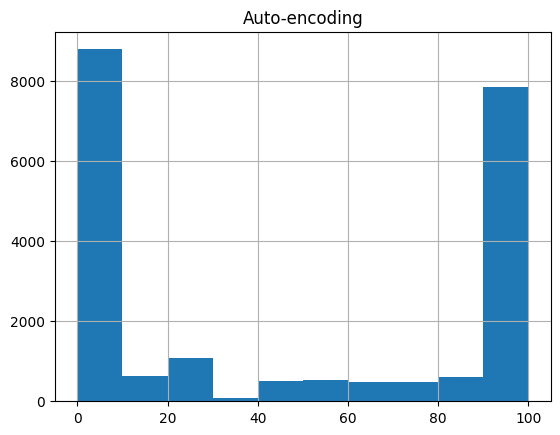

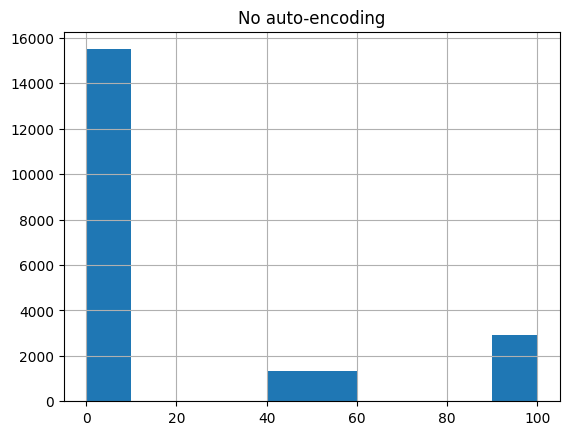

auto_encoder
coverage autoencoding: 13094, (0.6221018624097301)
coverage no auto encoding: 5553, (0.2638255416191562)
# rows added in subgroups: 7574 (0.3598441657164576)
# rows no longer in subgroups: 33, (0.0015678449258836945)
average subgroup size auto encoded: 9921.35
average subgroup size no auto encoding: 4235.05
WRACC auto encoding: Max: 0.206845412870345, Mean: 0.19404694122976912
WRACC no auto encoding: Max: 0.10803418181114251, Mean: 0.10790805699982998


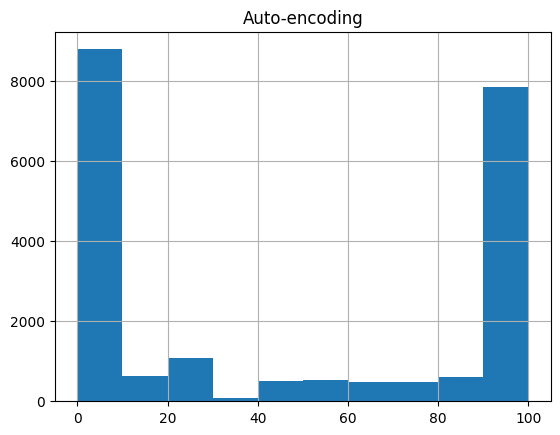

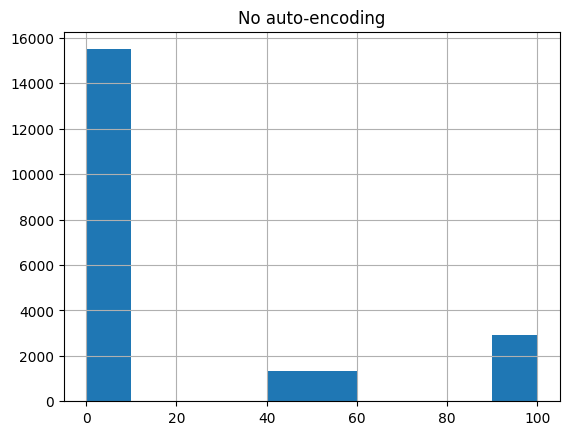

PCA
coverage autoencoding: 13176, (0.6259977194982896)
coverage no auto encoding: 5553, (0.2638255416191562)
# rows added in subgroups: 7632 (0.36259977194982895)
# rows no longer in subgroups: 9, (0.00042759407069555304)
average subgroup size auto encoded: 8953.99
average subgroup size no auto encoding: 4235.05
WRACC auto encoding: Max: 0.22244184294471048, Mean: 0.20875887493804318
WRACC no auto encoding: Max: 0.10803418181114251, Mean: 0.10790805699982998


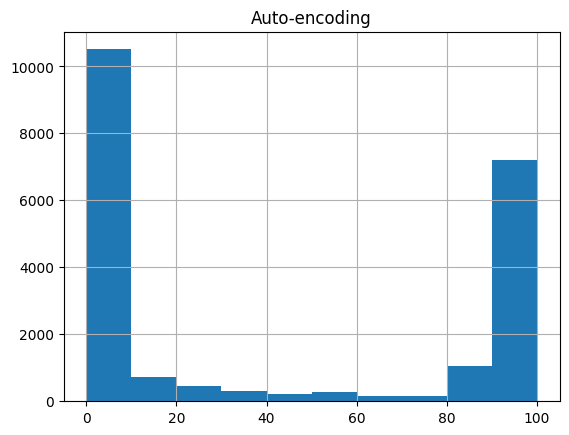

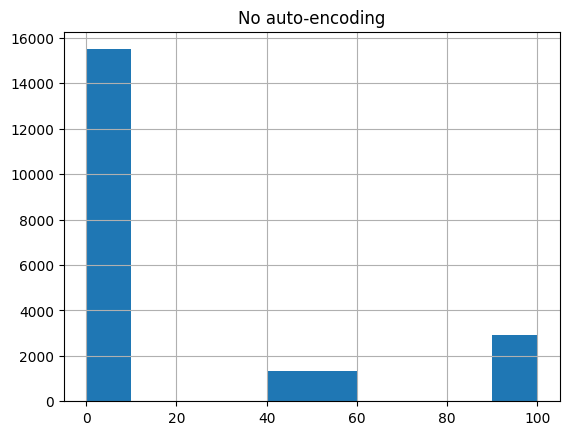

SPCA
coverage autoencoding: 14450, (0.6865260357278601)
coverage no auto encoding: 5553, (0.2638255416191562)
# rows added in subgroups: 8898 (0.4227480045610034)
# rows no longer in subgroups: 1, (4.751045229950589e-05)
average subgroup size auto encoded: 7798.87
average subgroup size no auto encoding: 4235.05
WRACC auto encoding: Max: 0.2145140982707568, Mean: 0.1799177247538738
WRACC no auto encoding: Max: 0.10803418181114251, Mean: 0.10790805699982998


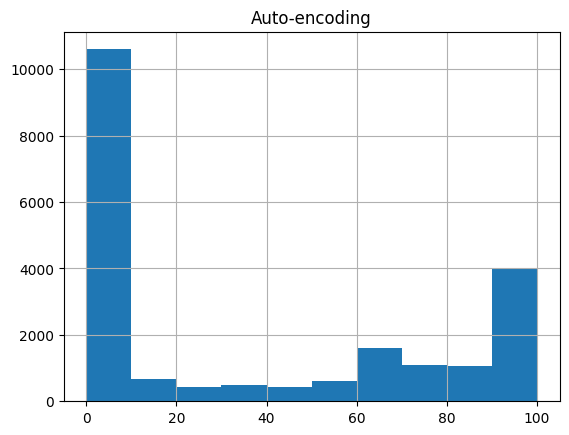

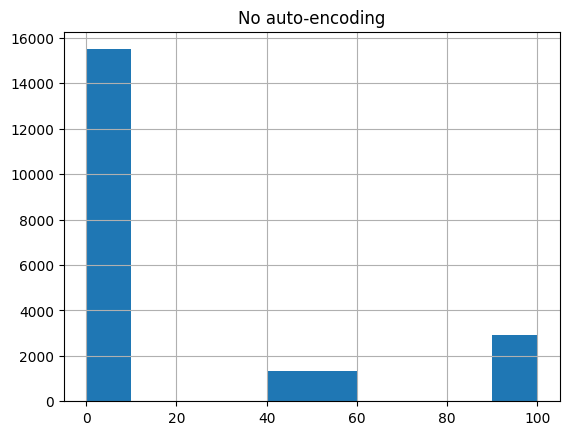

Soybean :    

coverage autoencoding: 169, (0.6353383458646616)
coverage no auto encoding: 266, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 97, (0.36466165413533835)
average subgroup size auto encoded: 119.06
average subgroup size no auto encoding: 266.0
WRACC auto encoding: Max: 0.19356662332523036, Mean: 0.1868149697552151
WRACC no auto encoding: Max: 0.0, Mean: 0.0


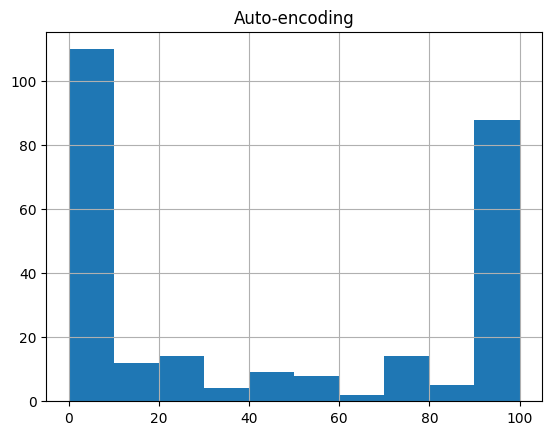

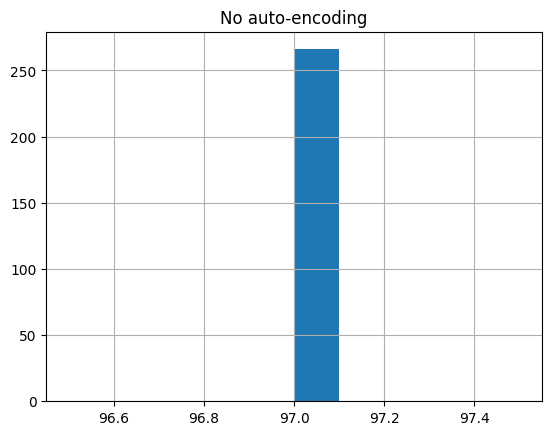

auto_encoder
coverage autoencoding: 169, (0.6353383458646616)
coverage no auto encoding: 266, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 97, (0.36466165413533835)
average subgroup size auto encoded: 119.06
average subgroup size no auto encoding: 266.0
WRACC auto encoding: Max: 0.19356662332523036, Mean: 0.1868149697552151
WRACC no auto encoding: Max: 0.0, Mean: 0.0


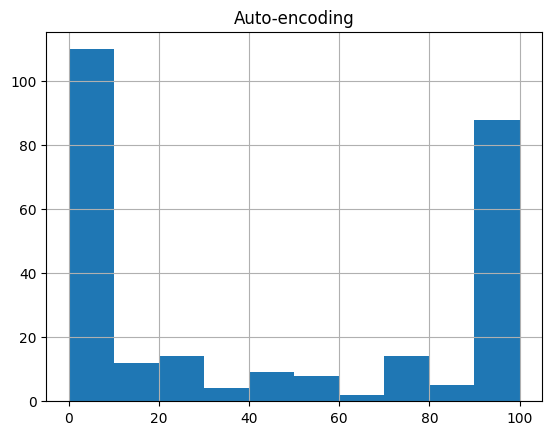

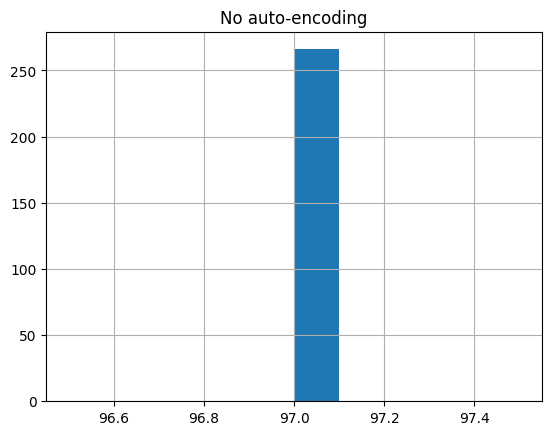

PCA
coverage autoencoding: 187, (0.7030075187969925)
coverage no auto encoding: 266, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 79, (0.29699248120300753)
average subgroup size auto encoded: 109.04
average subgroup size no auto encoding: 266.0
WRACC auto encoding: Max: 0.19622364181129515, Mean: 0.16300667081236928
WRACC no auto encoding: Max: 0.0, Mean: 0.0


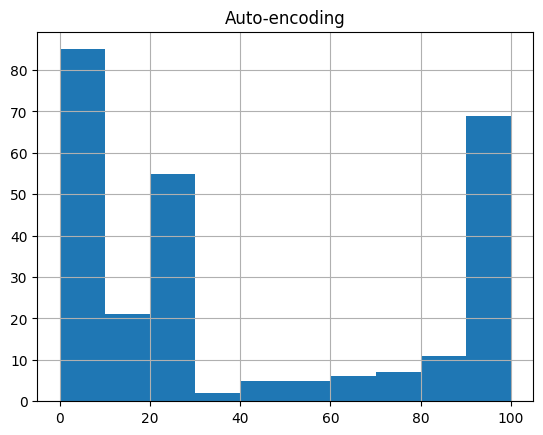

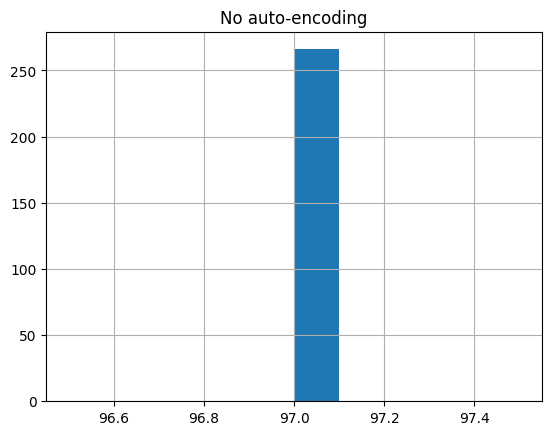

SPCA
coverage autoencoding: 152, (0.5714285714285714)
coverage no auto encoding: 266, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 114, (0.42857142857142855)
average subgroup size auto encoded: 91.01
average subgroup size no auto encoding: 266.0
WRACC auto encoding: Max: 0.20374243880377635, Mean: 0.16910311493018257
WRACC no auto encoding: Max: 0.0, Mean: 0.0


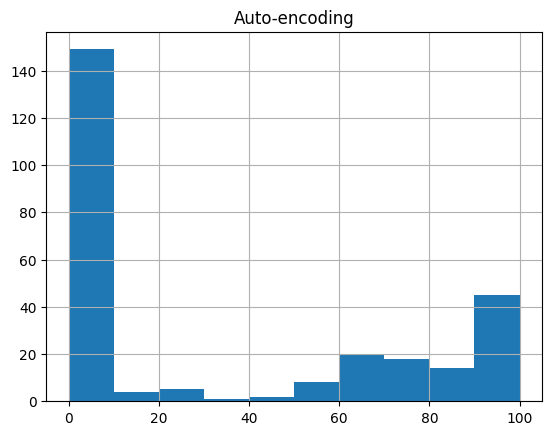

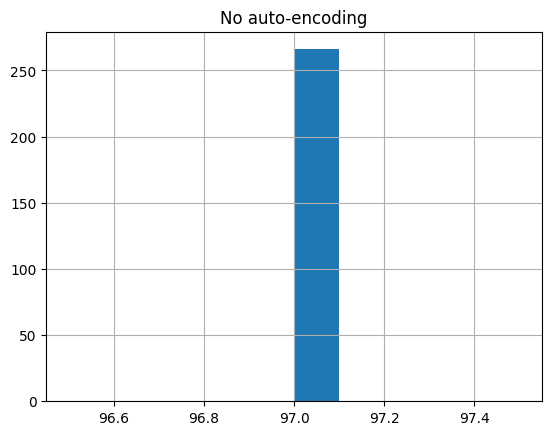

Mushroom :    

coverage autoencoding: 4429, (0.5451747907434761)
coverage no auto encoding: 4596, (0.5657311669128509)
# rows added in subgroups: 1218 (0.1499261447562777)
# rows no longer in subgroups: 1385, (0.1704825209256524)
average subgroup size auto encoded: 3241.6
average subgroup size no auto encoding: 4018.08
WRACC auto encoding: Max: 0.16271408384224723, Mean: 0.15769771399050803
WRACC no auto encoding: Max: 0.24202604582200896, Mean: 0.2260131332150777


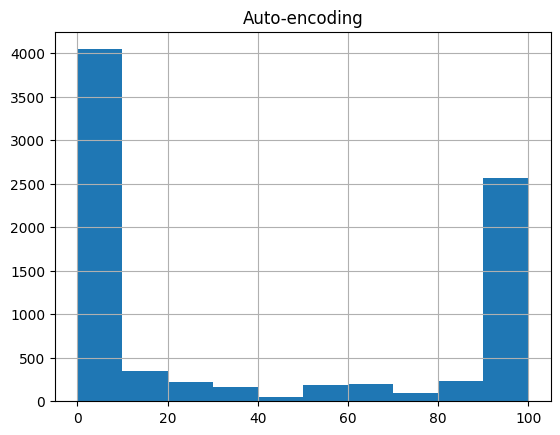

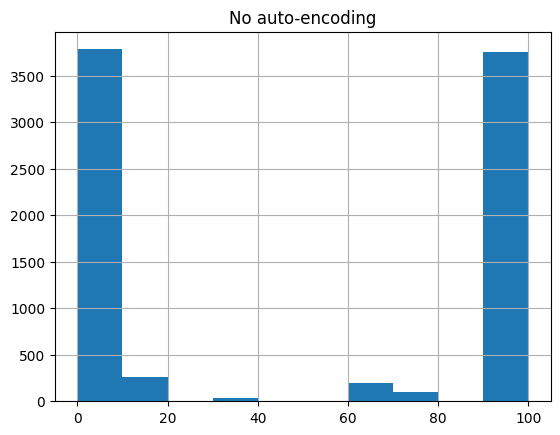

auto_encoder
coverage autoencoding: 4429, (0.5451747907434761)
coverage no auto encoding: 4596, (0.5657311669128509)
# rows added in subgroups: 1218 (0.1499261447562777)
# rows no longer in subgroups: 1385, (0.1704825209256524)
average subgroup size auto encoded: 3241.6
average subgroup size no auto encoding: 4018.08
WRACC auto encoding: Max: 0.16271408384224723, Mean: 0.15769771399050803
WRACC no auto encoding: Max: 0.24202604582200896, Mean: 0.2260131332150777


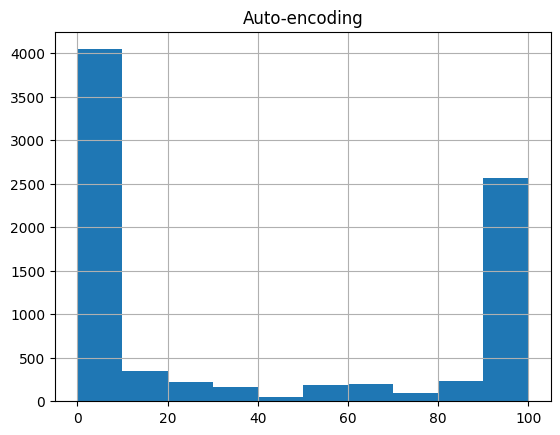

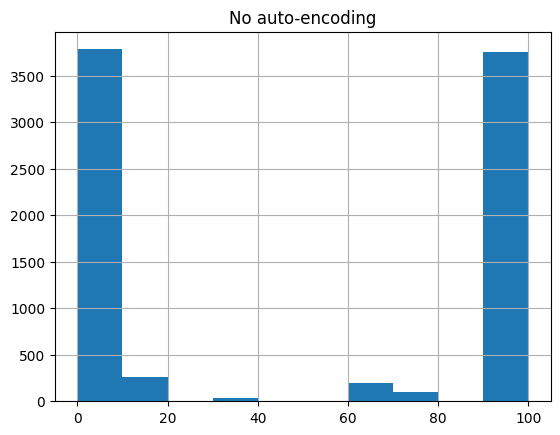

PCA
coverage autoencoding: 4835, (0.595150172328902)
coverage no auto encoding: 4596, (0.5657311669128509)
# rows added in subgroups: 891 (0.10967503692762186)
# rows no longer in subgroups: 652, (0.08025603151157065)
average subgroup size auto encoded: 3096.59
average subgroup size no auto encoding: 4018.08
WRACC auto encoding: Max: 0.19071974256241456, Mean: 0.1609681424866805
WRACC no auto encoding: Max: 0.24202604582200896, Mean: 0.2260131332150777


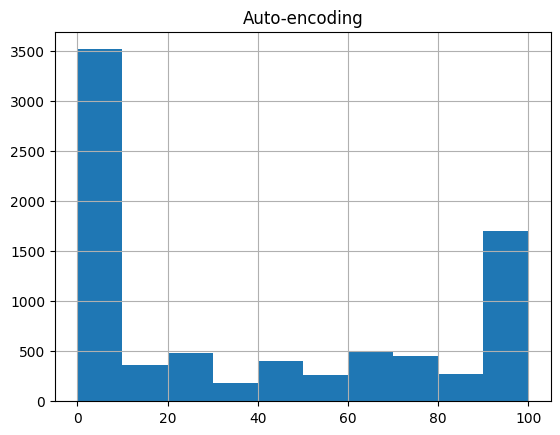

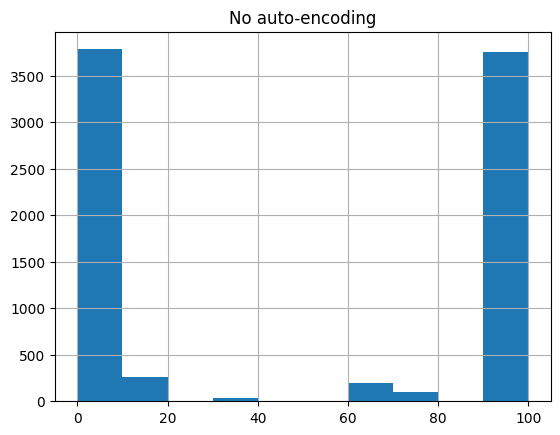

SPCA
coverage autoencoding: 4485, (0.5520679468242246)
coverage no auto encoding: 4596, (0.5657311669128509)
# rows added in subgroups: 1046 (0.12875430822255046)
# rows no longer in subgroups: 1157, (0.14241752831117677)
average subgroup size auto encoded: 2844.2
average subgroup size no auto encoding: 4018.08
WRACC auto encoding: Max: 0.19427117007894135, Mean: 0.16702786523315014
WRACC no auto encoding: Max: 0.24202604582200896, Mean: 0.2260131332150777


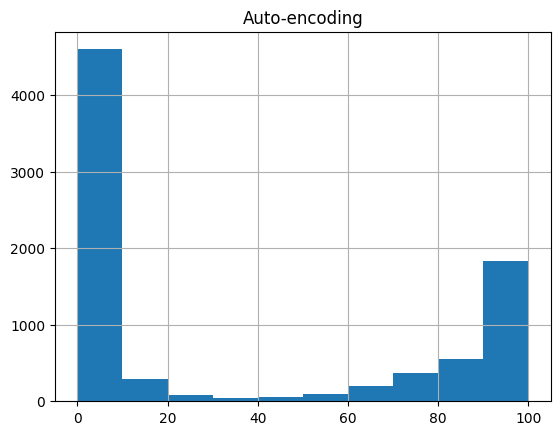

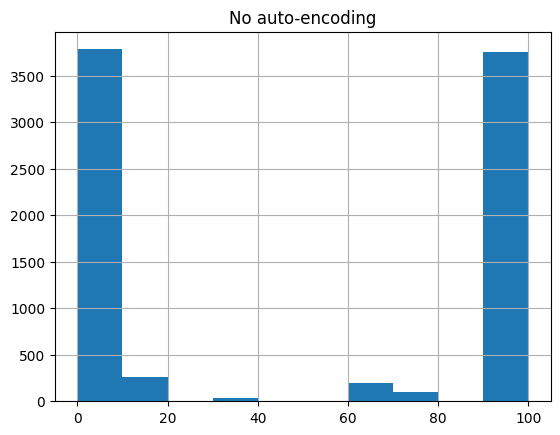

Adult :    

coverage autoencoding: 12211, (0.2500102370910282)
coverage no auto encoding: 22379, (0.45819172024077637)
# rows added in subgroups: 5659 (0.11586339625731952)
# rows no longer in subgroups: 15827, (0.32404487940706767)
average subgroup size auto encoded: 6294.58
average subgroup size no auto encoding: 20846.47
WRACC auto encoding: Max: 0.03156651180440597, Mean: 0.02705336245066467
WRACC no auto encoding: Max: 0.06637478684687972, Mean: 0.06545387406309071


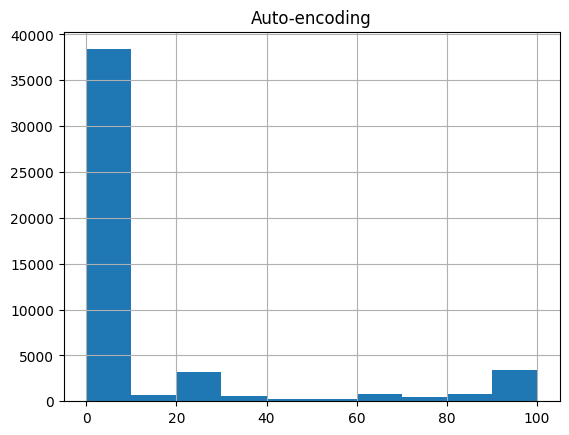

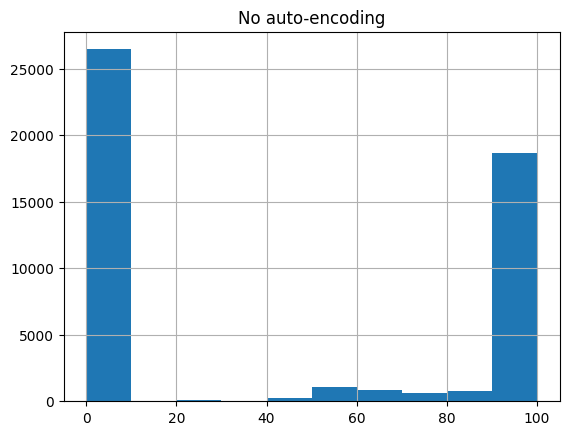

auto_encoder
coverage autoencoding: 12211, (0.2500102370910282)
coverage no auto encoding: 22379, (0.45819172024077637)
# rows added in subgroups: 5659 (0.11586339625731952)
# rows no longer in subgroups: 15827, (0.32404487940706767)
average subgroup size auto encoded: 6294.58
average subgroup size no auto encoding: 20846.47
WRACC auto encoding: Max: 0.03156651180440597, Mean: 0.02705336245066467
WRACC no auto encoding: Max: 0.06637478684687972, Mean: 0.06545387406309071


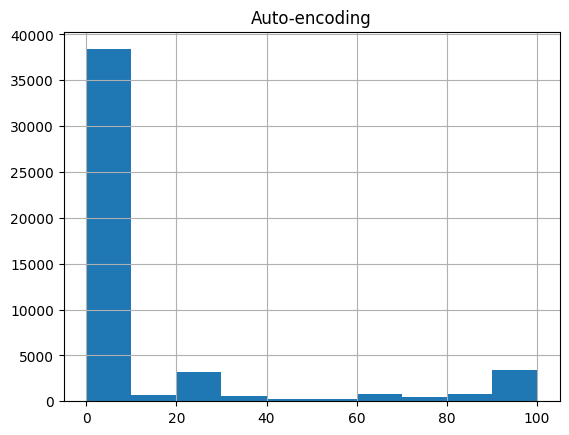

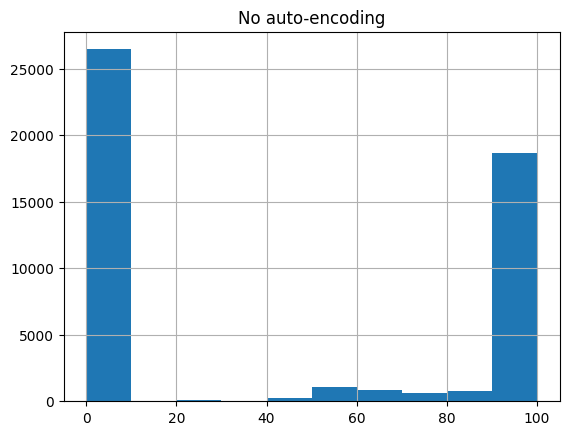

PCA
coverage autoencoding: 27604, (0.5651693214856066)
coverage no auto encoding: 22379, (0.45819172024077637)
# rows added in subgroups: 6218 (0.12730846402686213)
# rows no longer in subgroups: 993, (0.020330862782031858)
average subgroup size auto encoded: 18845.61
average subgroup size no auto encoding: 20846.47
WRACC auto encoding: Max: 0.06617780930296362, Mean: 0.06345199424125254
WRACC no auto encoding: Max: 0.06637478684687972, Mean: 0.06545387406309071


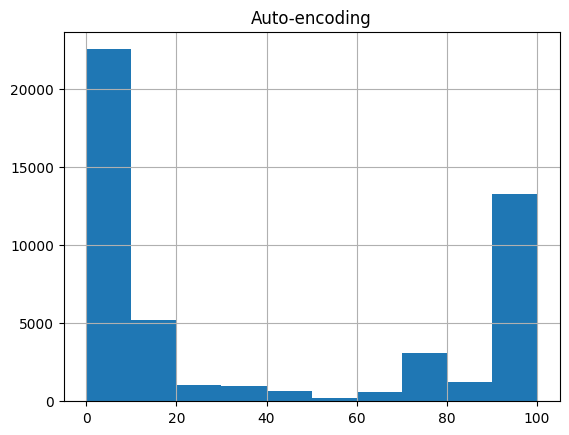

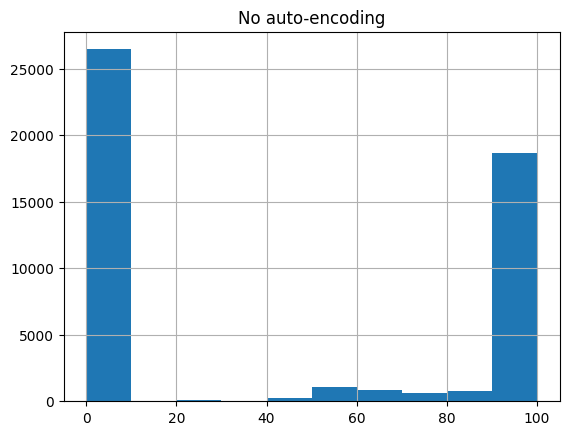

SPCA
coverage autoencoding: 25200, (0.5159493878219565)
coverage no auto encoding: 22379, (0.45819172024077637)
# rows added in subgroups: 7246 (0.14835592318086893)
# rows no longer in subgroups: 4425, (0.09059825559968879)
average subgroup size auto encoded: 18344.98
average subgroup size no auto encoding: 20846.47
WRACC auto encoding: Max: 0.06462177146667518, Mean: 0.062962050539745
WRACC no auto encoding: Max: 0.06637478684687972, Mean: 0.06545387406309071


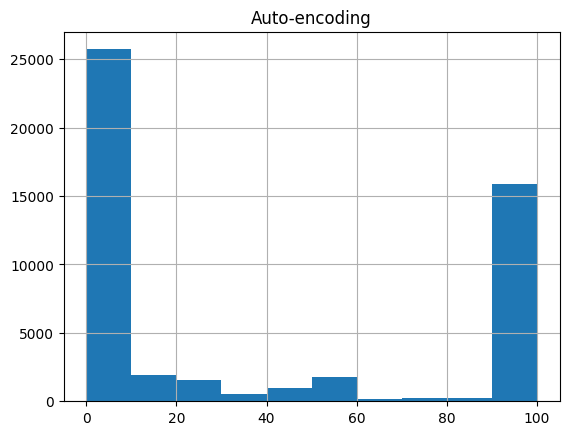

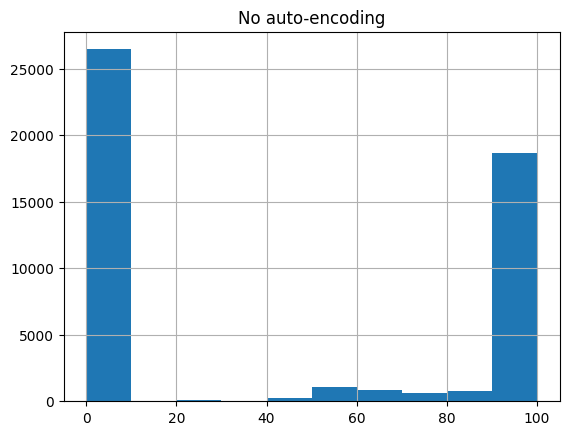

Depth-First Search :    


Ionosphere :    

coverage auto-encoding: 338, (0.9629629629629629)
coverage no auto-encoding: 333, (0.9487179487179487)
# rows added in subgroups: 14 (0.039886039886039885)
# rows no longer in subgroups: 9, (0.02564102564102564)
average subgroup size auto encoded: 26.13
average subgroup size no auto encoding: 58.82
WRACC auto-encoding: Max: 0.04594930235955876, Mean: 0.013787712762071731
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.04347505296223243


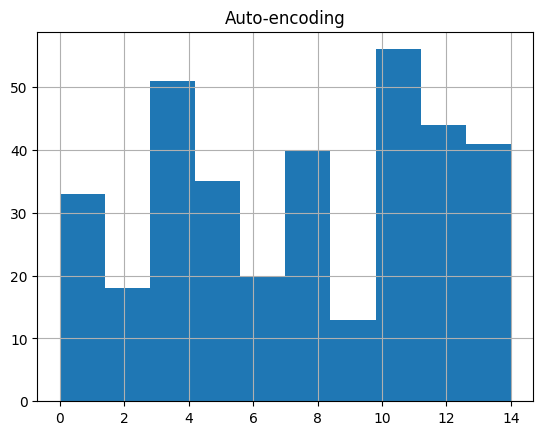

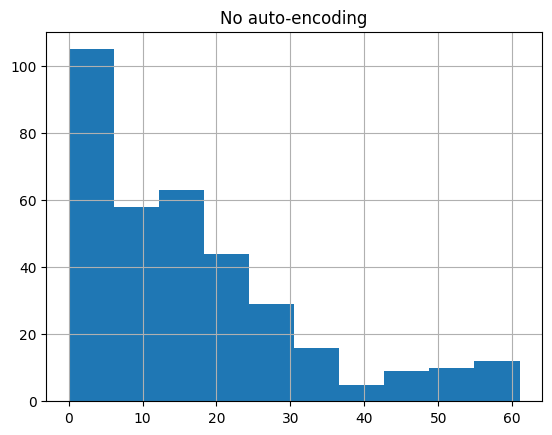

auto_encoder
coverage auto-encoding: 338, (0.9629629629629629)
coverage no auto-encoding: 333, (0.9487179487179487)
# rows added in subgroups: 14 (0.039886039886039885)
# rows no longer in subgroups: 9, (0.02564102564102564)
average subgroup size auto encoded: 26.13
average subgroup size no auto encoding: 58.82
WRACC auto-encoding: Max: 0.04594930235955876, Mean: 0.013787712762071731
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.04347505296223243


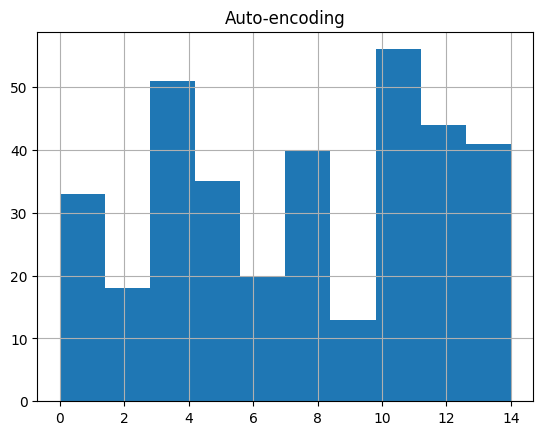

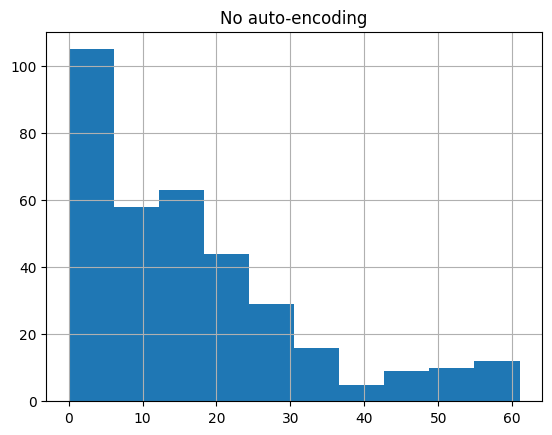

PCA
coverage auto-encoding: 339, (0.9658119658119658)
coverage no auto-encoding: 333, (0.9487179487179487)
# rows added in subgroups: 13 (0.037037037037037035)
# rows no longer in subgroups: 7, (0.019943019943019943)
average subgroup size auto encoded: 24.13
average subgroup size no auto encoding: 58.82
WRACC auto-encoding: Max: 0.060194316604573, Mean: 0.014592738695302795
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.04347505296223243


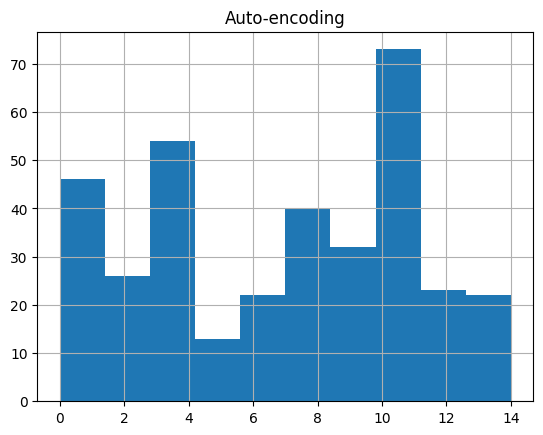

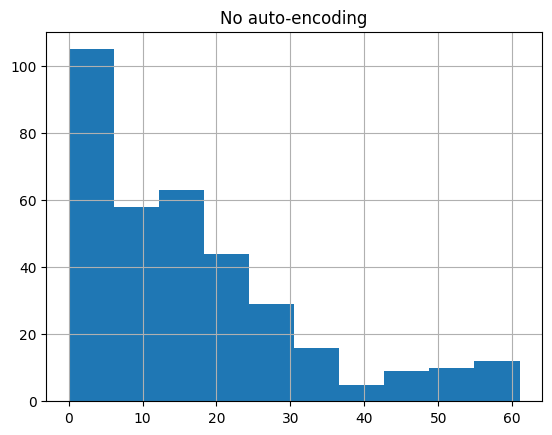

SPCA
coverage auto-encoding: 344, (0.98005698005698)
coverage no auto-encoding: 333, (0.9487179487179487)
# rows added in subgroups: 17 (0.04843304843304843)
# rows no longer in subgroups: 6, (0.017094017094017096)
average subgroup size auto encoded: 24.75
average subgroup size no auto encoding: 58.82
WRACC auto-encoding: Max: 0.05836803272700707, Mean: 0.013204032434801657
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.04347505296223243


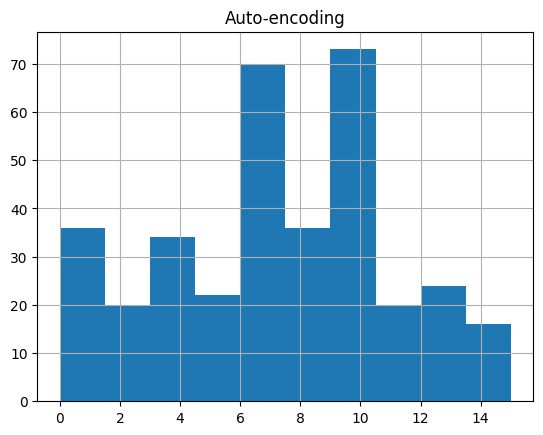

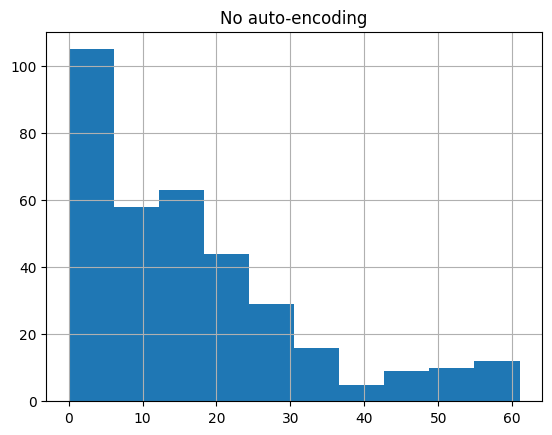

Arrhythmia :    

coverage auto-encoding: 395, (0.9404761904761905)
coverage no auto-encoding: 296, (0.7047619047619048)
# rows added in subgroups: 108 (0.2571428571428571)
# rows no longer in subgroups: 9, (0.02142857142857143)
average subgroup size auto encoded: 22.6
average subgroup size no auto encoding: 97.57
WRACC auto-encoding: Max: 0.06047619047619049, Mean: 0.009497619047619046
WRACC no auto-encoding: Max: 0.06554421768707483, Mean: 0.05814812925170067


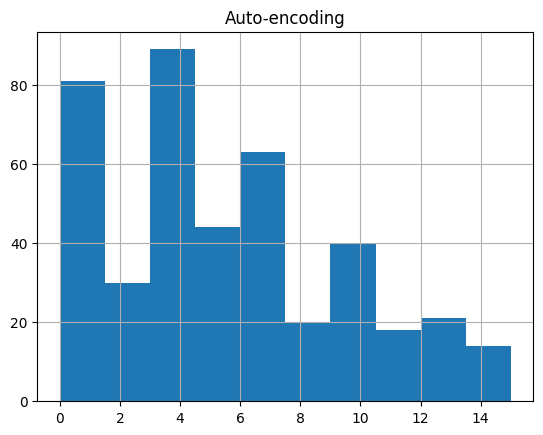

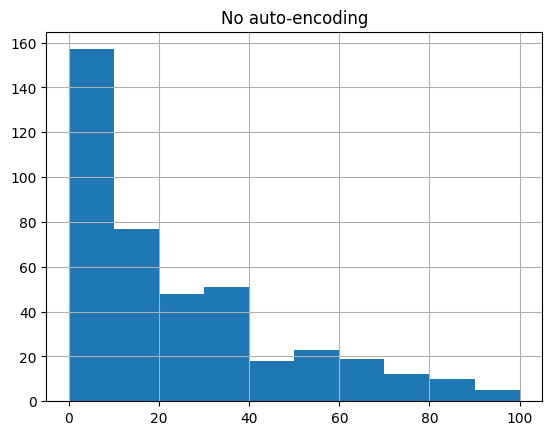

auto_encoder
coverage auto-encoding: 395, (0.9404761904761905)
coverage no auto-encoding: 296, (0.7047619047619048)
# rows added in subgroups: 108 (0.2571428571428571)
# rows no longer in subgroups: 9, (0.02142857142857143)
average subgroup size auto encoded: 22.6
average subgroup size no auto encoding: 97.57
WRACC auto-encoding: Max: 0.06047619047619049, Mean: 0.009497619047619046
WRACC no auto-encoding: Max: 0.06554421768707483, Mean: 0.05814812925170067


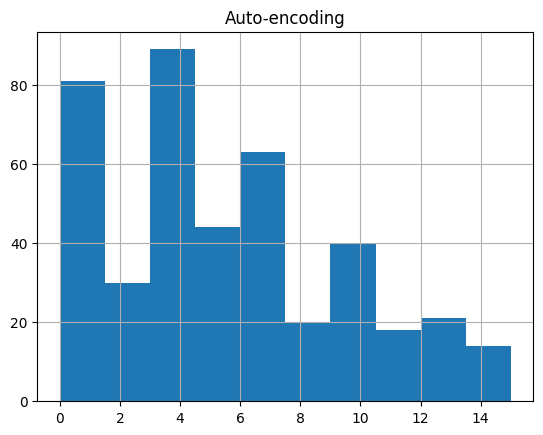

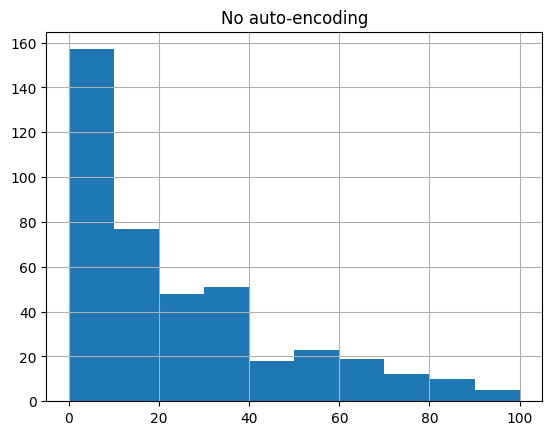

PCA
coverage auto-encoding: 404, (0.9619047619047619)
coverage no auto-encoding: 296, (0.7047619047619048)
# rows added in subgroups: 110 (0.2619047619047619)
# rows no longer in subgroups: 2, (0.004761904761904762)
average subgroup size auto encoded: 21.45
average subgroup size no auto encoding: 97.57
WRACC auto-encoding: Max: 0.06047619047619049, Mean: 0.006009353741496598
WRACC no auto-encoding: Max: 0.06554421768707483, Mean: 0.05814812925170067


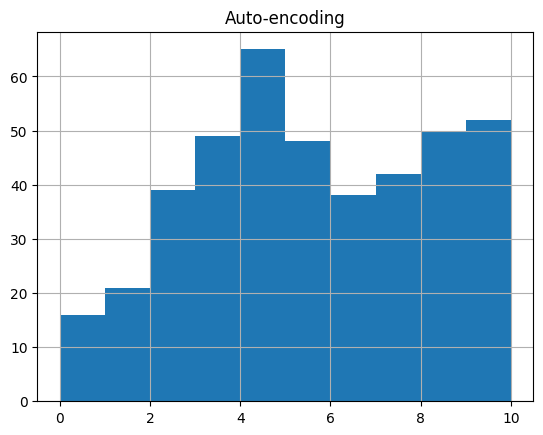

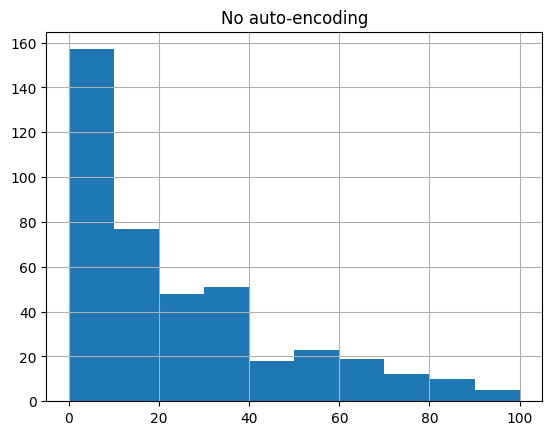

SPCA
coverage auto-encoding: 415, (0.9880952380952381)
coverage no auto-encoding: 296, (0.7047619047619048)
# rows added in subgroups: 120 (0.2857142857142857)
# rows no longer in subgroups: 1, (0.002380952380952381)
average subgroup size auto encoded: 24.0
average subgroup size no auto encoding: 97.57
WRACC auto-encoding: Max: 0.06761904761904762, Mean: 0.005257653061224488
WRACC no auto-encoding: Max: 0.06554421768707483, Mean: 0.05814812925170067


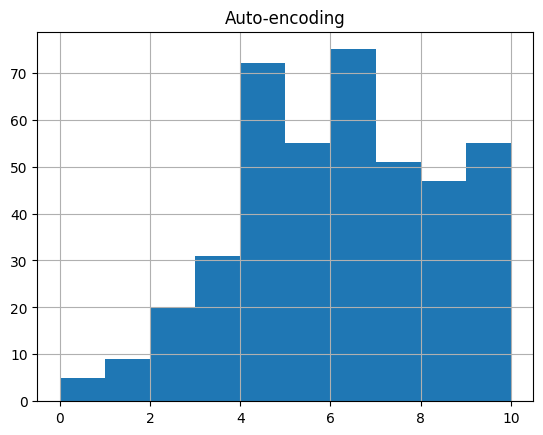

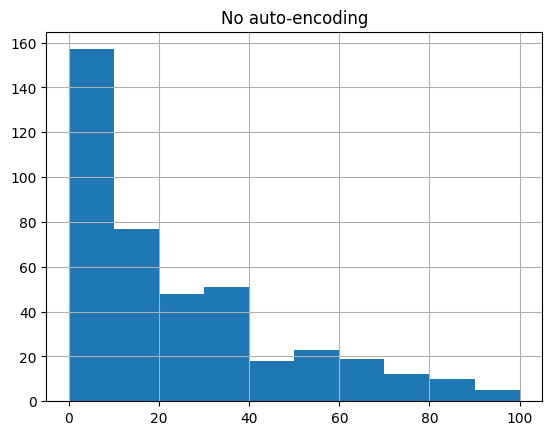

Indoor :    

coverage auto-encoding: 19418, (0.9225579627518053)
coverage no auto-encoding: 8417, (0.3998954770049411)
# rows added in subgroups: 11001 (0.5226624857468644)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 1164.57
average subgroup size no auto encoding: 4176.44
WRACC auto-encoding: Max: 0.08101853958612057, Mean: 0.013708722066707202
WRACC no auto-encoding: Max: 0.10696403189697552, Mean: 0.10639425877988103


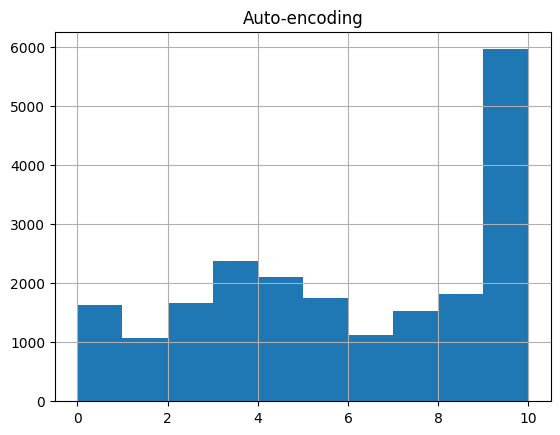

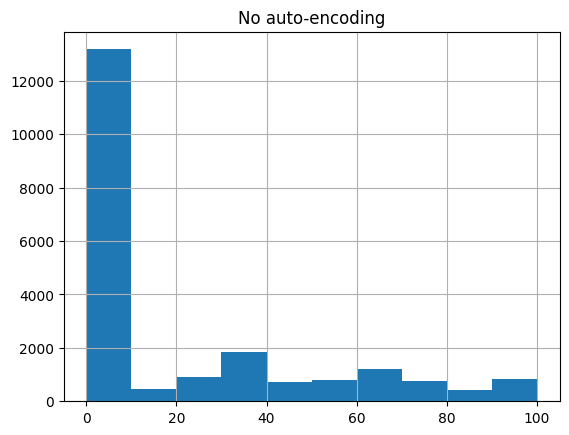

auto_encoder
coverage auto-encoding: 19418, (0.9225579627518053)
coverage no auto-encoding: 8417, (0.3998954770049411)
# rows added in subgroups: 11001 (0.5226624857468644)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 1164.57
average subgroup size no auto encoding: 4176.44
WRACC auto-encoding: Max: 0.08101853958612057, Mean: 0.013708722066707202
WRACC no auto-encoding: Max: 0.10696403189697552, Mean: 0.10639425877988103


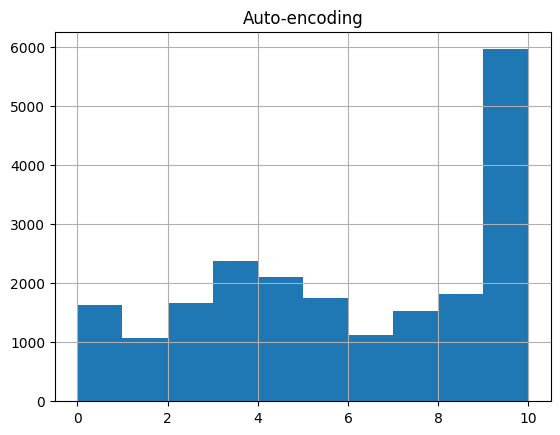

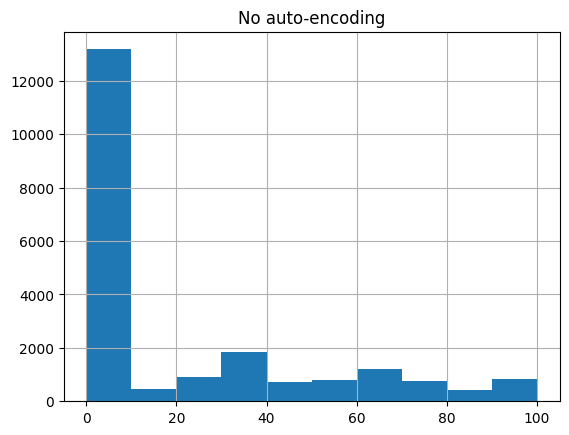

PCA
coverage auto-encoding: 15845, (0.7528031166856708)
coverage no auto-encoding: 8417, (0.3998954770049411)
# rows added in subgroups: 7428 (0.35290763968072975)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 1115.16
average subgroup size no auto encoding: 4176.44
WRACC auto-encoding: Max: 0.10726978901530895, Mean: 0.020435474918887326
WRACC no auto-encoding: Max: 0.10696403189697552, Mean: 0.10639425877988103


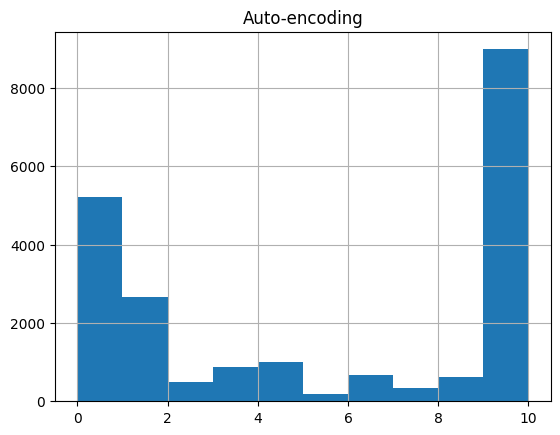

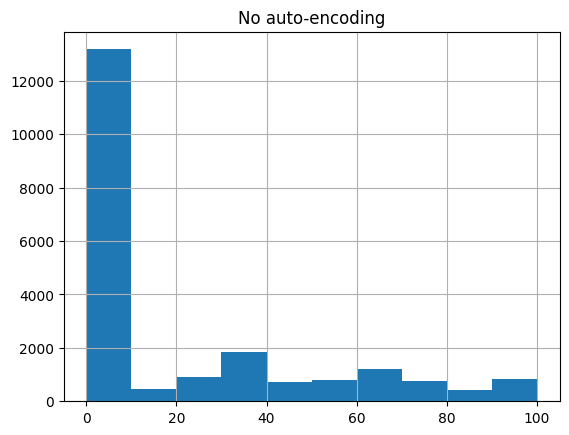

SPCA
coverage auto-encoding: 18146, (0.8621246674268339)
coverage no auto-encoding: 8417, (0.3998954770049411)
# rows added in subgroups: 9739 (0.46270429494488785)
# rows no longer in subgroups: 10, (0.0004751045229950589)
average subgroup size auto encoded: 1104.0
average subgroup size no auto encoding: 4176.44
WRACC auto-encoding: Max: 0.10724430925544784, Mean: 0.01743383460742967
WRACC no auto-encoding: Max: 0.10696403189697552, Mean: 0.10639425877988103


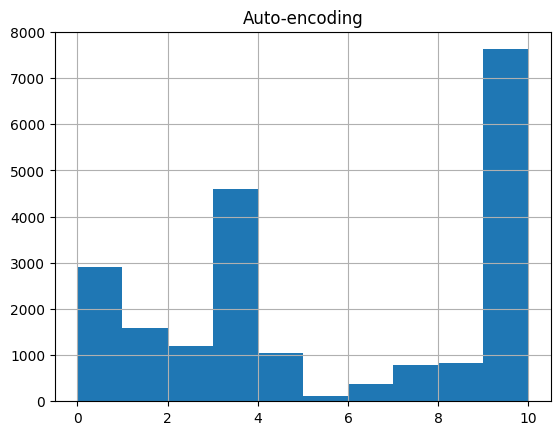

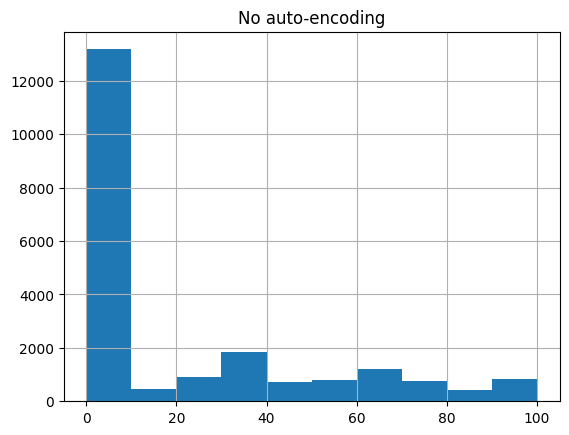

Soybean :    

coverage auto-encoding: 253, (0.9511278195488722)
coverage no auto-encoding: 251, (0.943609022556391)
# rows added in subgroups: 10 (0.03759398496240601)
# rows no longer in subgroups: 8, (0.03007518796992481)
average subgroup size auto encoded: 17.56
average subgroup size no auto encoding: 134.99
WRACC auto-encoding: Max: 0.10379331788116908, Mean: 0.018696082311040762
WRACC no auto-encoding: Max: 0.24068630222171972, Mean: 0.16175730680083666


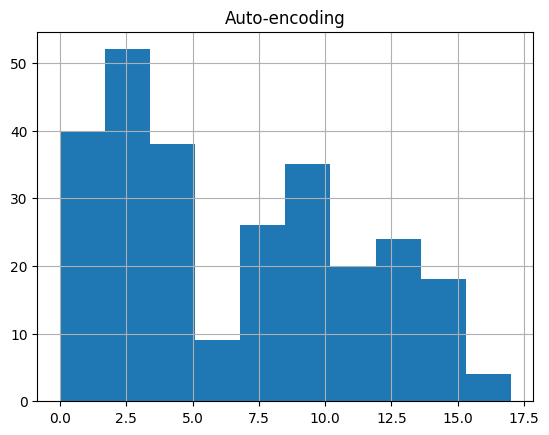

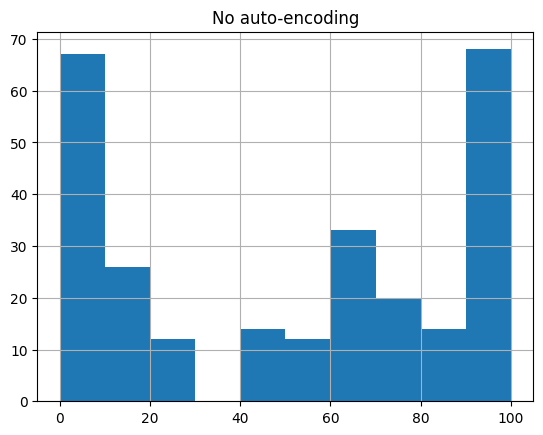

auto_encoder
coverage auto-encoding: 253, (0.9511278195488722)
coverage no auto-encoding: 251, (0.943609022556391)
# rows added in subgroups: 10 (0.03759398496240601)
# rows no longer in subgroups: 8, (0.03007518796992481)
average subgroup size auto encoded: 17.56
average subgroup size no auto encoding: 134.99
WRACC auto-encoding: Max: 0.10379331788116908, Mean: 0.018696082311040762
WRACC no auto-encoding: Max: 0.24068630222171972, Mean: 0.16175730680083666


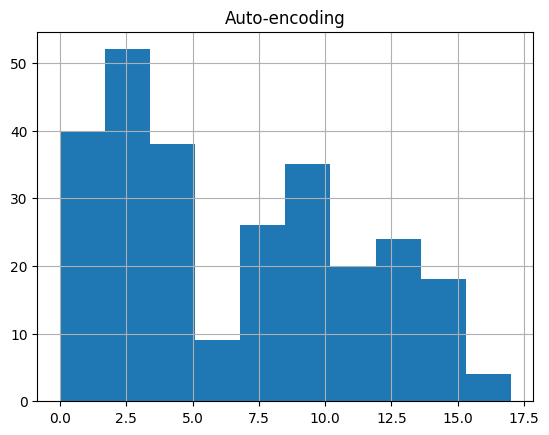

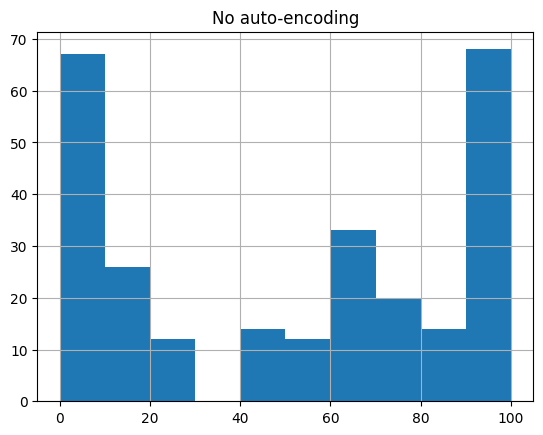

PCA
coverage auto-encoding: 264, (0.9924812030075187)
coverage no auto-encoding: 251, (0.943609022556391)
# rows added in subgroups: 13 (0.04887218045112782)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 16.92
average subgroup size no auto encoding: 134.99
WRACC auto-encoding: Max: 0.06427723443948218, Mean: 0.011997286449205724
WRACC no auto-encoding: Max: 0.24068630222171972, Mean: 0.16175730680083666


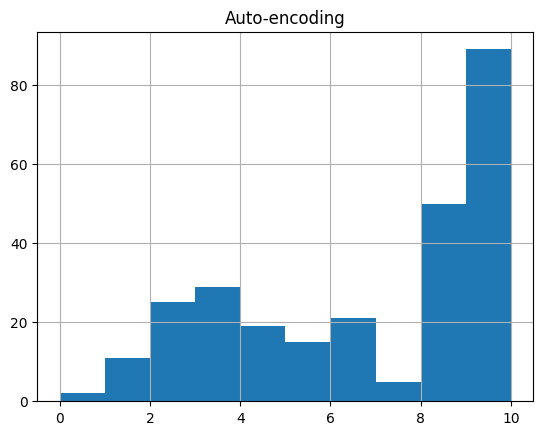

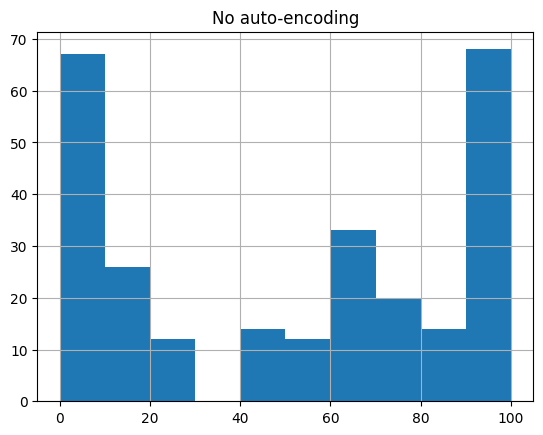

SPCA
coverage auto-encoding: 266, (1.0)
coverage no auto-encoding: 251, (0.943609022556391)
# rows added in subgroups: 15 (0.05639097744360902)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 15.88
average subgroup size no auto encoding: 134.99
WRACC auto-encoding: Max: 0.09811182090564757, Mean: 0.010088473062355137
WRACC no auto-encoding: Max: 0.24068630222171972, Mean: 0.16175730680083666


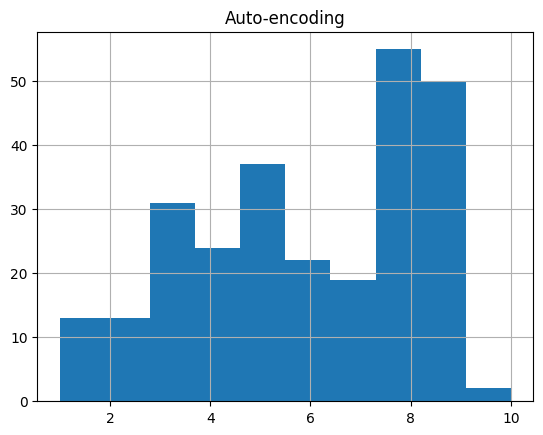

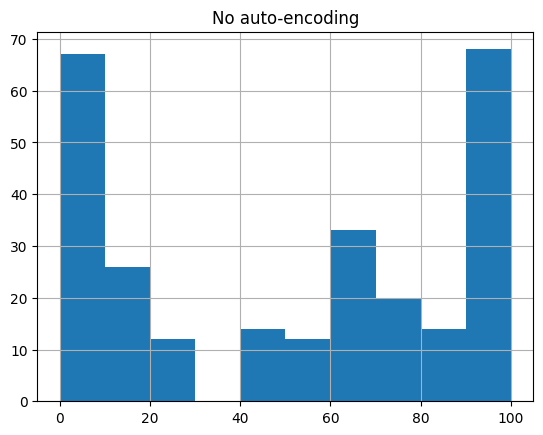

Mushroom :    

coverage auto-encoding: 7751, (0.9540866568193008)
coverage no auto-encoding: 8124, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 373, (0.045913343180699166)
average subgroup size auto encoded: 486.9
average subgroup size no auto encoding: 2105.28
WRACC auto-encoding: Max: 0.07677296827776069, Mean: 0.015498338044893029
WRACC no auto-encoding: Max: 0.1823755424596742, Mean: 0.09028494814860072


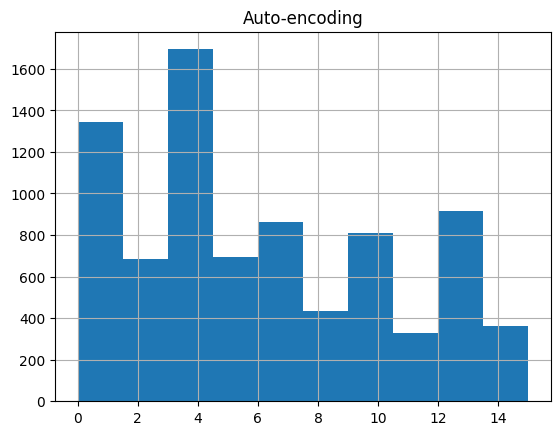

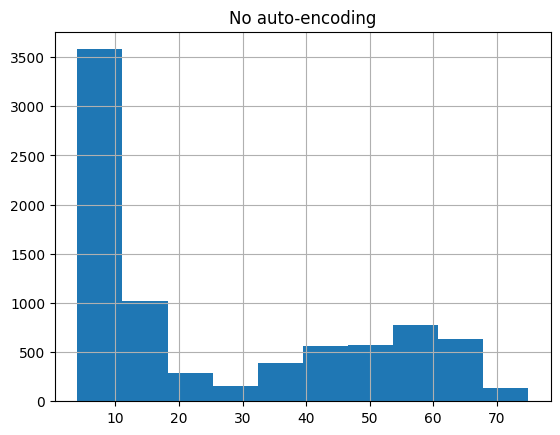

auto_encoder
coverage auto-encoding: 7751, (0.9540866568193008)
coverage no auto-encoding: 8124, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 373, (0.045913343180699166)
average subgroup size auto encoded: 486.9
average subgroup size no auto encoding: 2105.28
WRACC auto-encoding: Max: 0.07677296827776069, Mean: 0.015498338044893029
WRACC no auto-encoding: Max: 0.1823755424596742, Mean: 0.09028494814860072


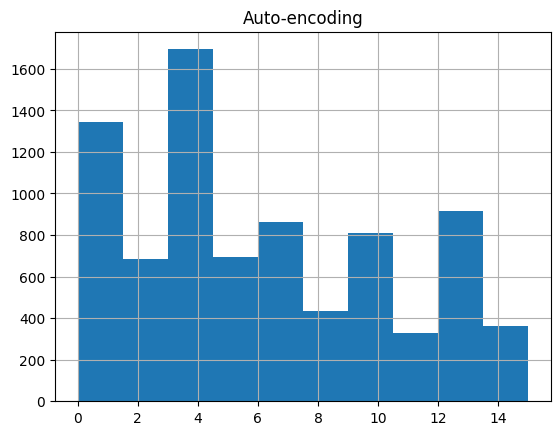

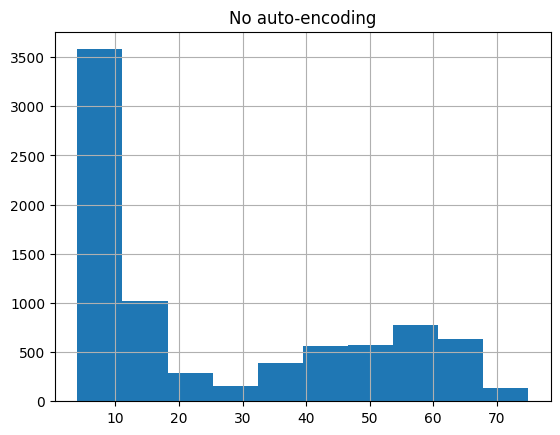

PCA
coverage auto-encoding: 7153, (0.8804775972427376)
coverage no auto-encoding: 8124, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 971, (0.11952240275726243)
average subgroup size auto encoded: 759.22
average subgroup size no auto encoding: 2105.28
WRACC auto-encoding: Max: 0.10354328198496907, Mean: 0.04005249867816932
WRACC no auto-encoding: Max: 0.1823755424596742, Mean: 0.09028494814860072


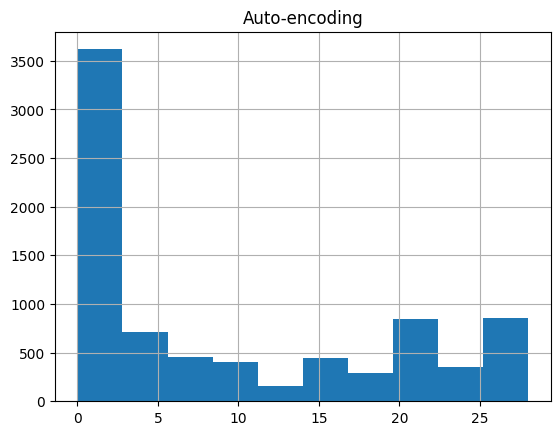

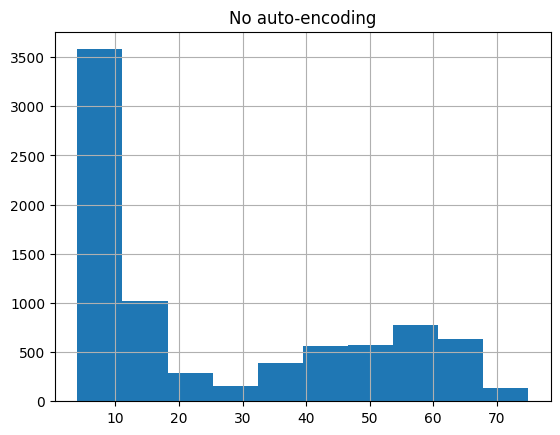

SPCA
coverage auto-encoding: 7150, (0.8801083210241261)
coverage no auto-encoding: 8124, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 974, (0.11989167897587395)
average subgroup size auto encoded: 622.89
average subgroup size no auto encoding: 2105.28
WRACC auto-encoding: Max: 0.10354328198496907, Mean: 0.03152908172949999
WRACC no auto-encoding: Max: 0.1823755424596742, Mean: 0.09028494814860072


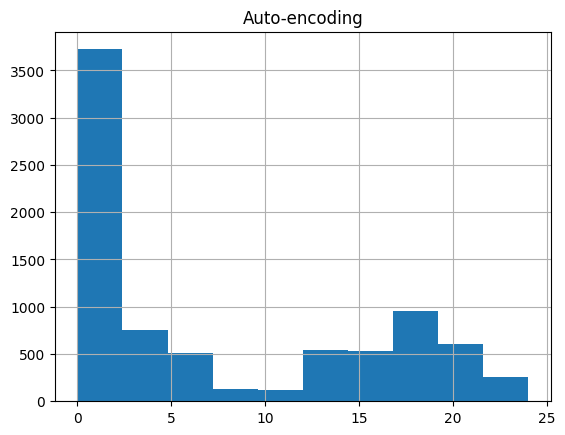

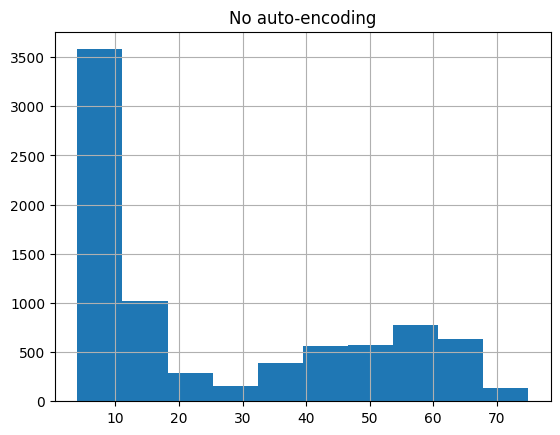

Adult :    

coverage auto-encoding: 48842, (1.0)
coverage no auto-encoding: 41678, (0.8533229597477581)
# rows added in subgroups: 7164 (0.14667704025224193)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 4308.985294117647
average subgroup size no auto encoding: 9164.5
WRACC auto-encoding: Max: 0.027494046419569255, Mean: 2.5618372265606845e-06
WRACC no auto-encoding: Max: 0.06345601575676821, Mean: 0.024945288728229945


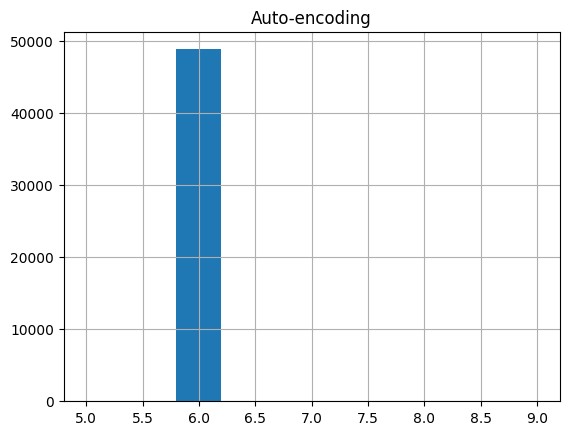

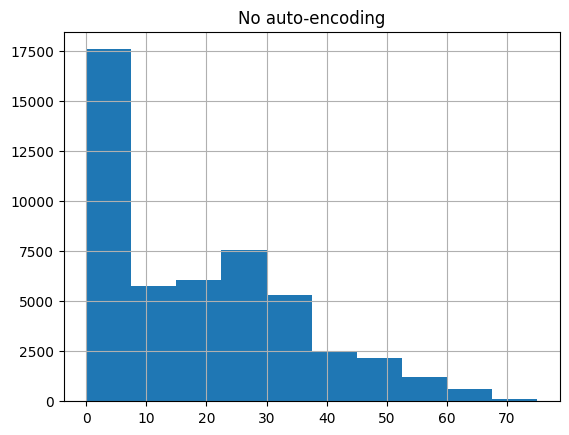

auto_encoder
coverage auto-encoding: 48842, (1.0)
coverage no auto-encoding: 41678, (0.8533229597477581)
# rows added in subgroups: 7164 (0.14667704025224193)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 4308.985294117647
average subgroup size no auto encoding: 9164.5
WRACC auto-encoding: Max: 0.027494046419569255, Mean: 2.5618372265606845e-06
WRACC no auto-encoding: Max: 0.06345601575676821, Mean: 0.024945288728229945


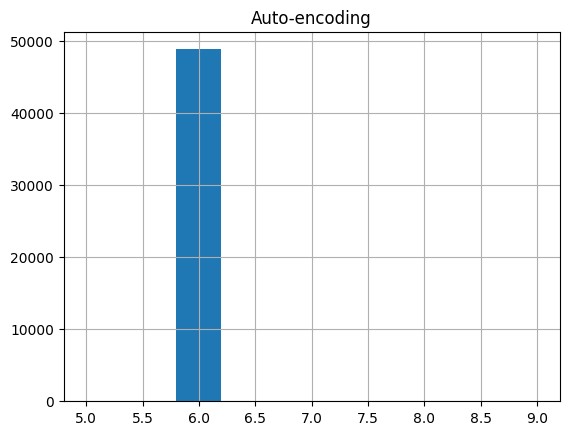

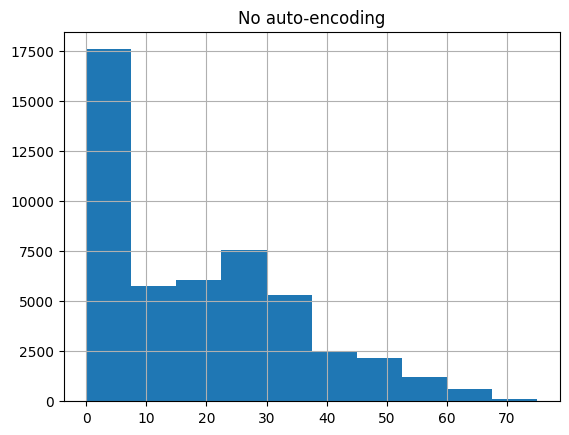

PCA
coverage auto-encoding: 45107, (0.9235289300192457)
coverage no auto-encoding: 41678, (0.8533229597477581)
# rows added in subgroups: 6296 (0.1289054502272634)
# rows no longer in subgroups: 2867, (0.05869947995577577)
average subgroup size auto encoded: 3183.91
average subgroup size no auto encoding: 9164.5
WRACC auto-encoding: Max: 0.048272054321344286, Mean: 0.006735355050478187
WRACC no auto-encoding: Max: 0.06345601575676821, Mean: 0.024945288728229945


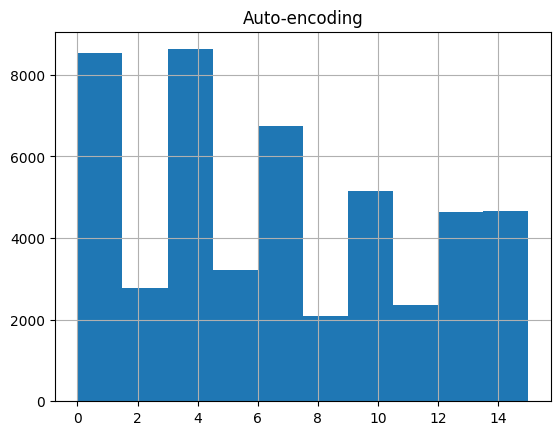

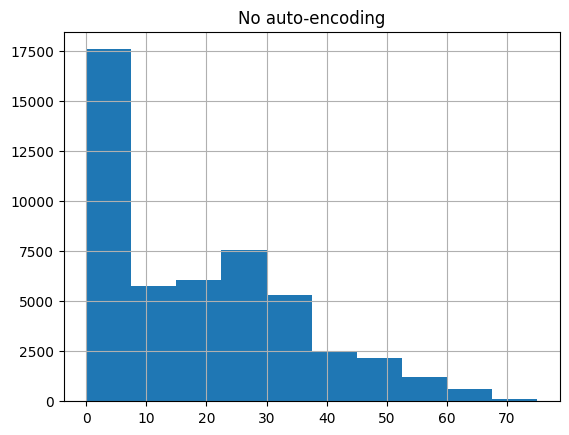

SPCA
coverage auto-encoding: 44482, (0.9107325662339789)
coverage no auto-encoding: 41678, (0.8533229597477581)
# rows added in subgroups: 5318 (0.10888170017607797)
# rows no longer in subgroups: 2514, (0.05147209368985709)
average subgroup size auto encoded: 2975.67
average subgroup size no auto encoding: 9164.5
WRACC auto-encoding: Max: 0.036847460733858105, Mean: 0.0069393533248083865
WRACC no auto-encoding: Max: 0.06345601575676821, Mean: 0.024945288728229945


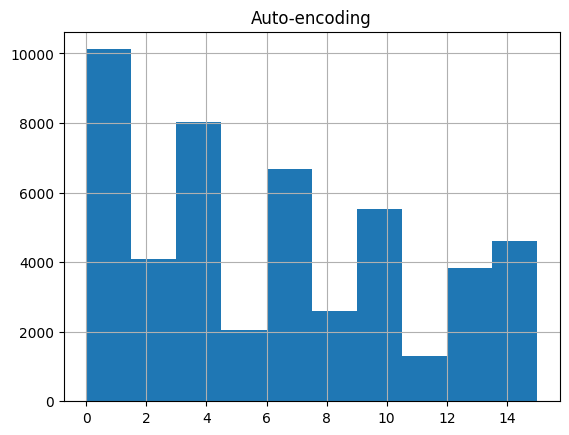

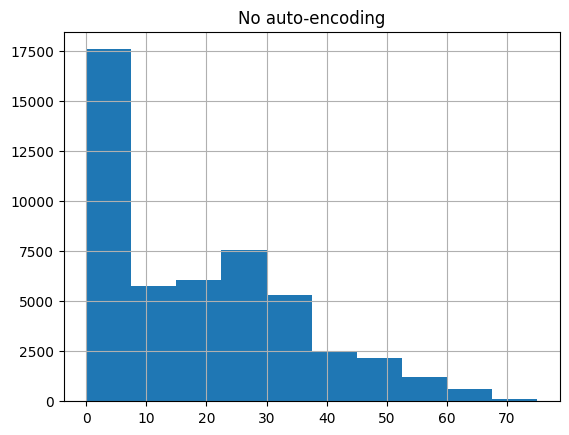

Best-First Search :    


Ionosphere :    

coverage auto-encoding: 338, (0.9629629629629629)
coverage no auto-encoding: 350, (0.9971509971509972)
# rows added in subgroups: 1 (0.002849002849002849)
# rows no longer in subgroups: 13, (0.037037037037037035)
average subgroup size auto encoded: 26.15
average subgroup size no auto encoding: 59.24
WRACC auto-encoding: Max: 0.04594930235955876, Mean: 0.013787712762071731
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.043401271093578775


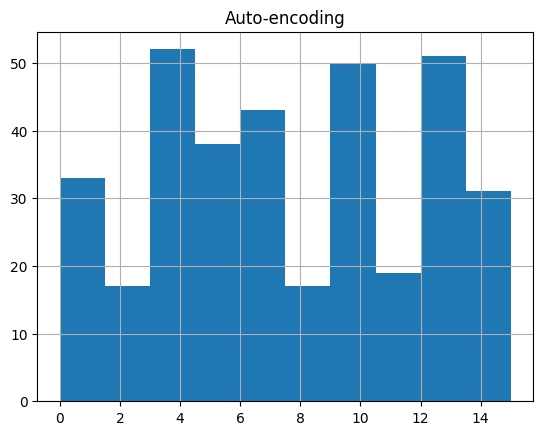

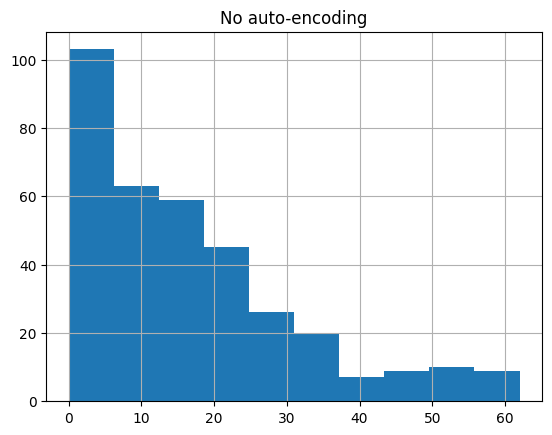

auto_encoder
coverage auto-encoding: 338, (0.9629629629629629)
coverage no auto-encoding: 350, (0.9971509971509972)
# rows added in subgroups: 1 (0.002849002849002849)
# rows no longer in subgroups: 13, (0.037037037037037035)
average subgroup size auto encoded: 26.15
average subgroup size no auto encoding: 59.24
WRACC auto-encoding: Max: 0.04594930235955876, Mean: 0.013787712762071731
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.043401271093578775


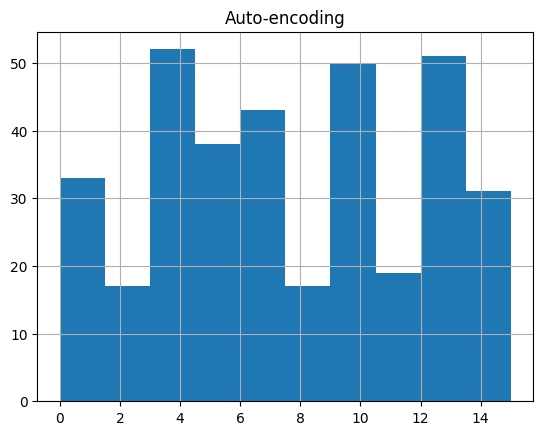

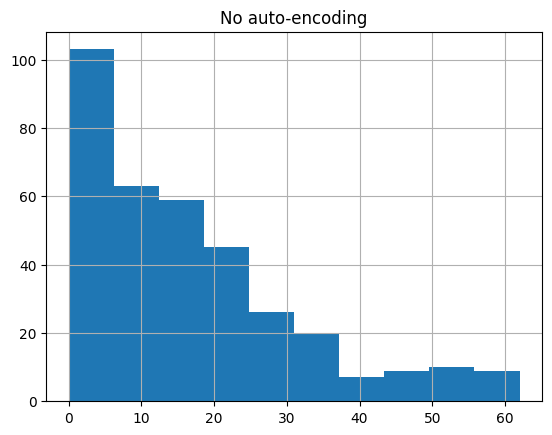

PCA
coverage auto-encoding: 339, (0.9658119658119658)
coverage no auto-encoding: 350, (0.9971509971509972)
# rows added in subgroups: 1 (0.002849002849002849)
# rows no longer in subgroups: 12, (0.03418803418803419)
average subgroup size auto encoded: 24.19
average subgroup size no auto encoding: 59.24
WRACC auto-encoding: Max: 0.060194316604573, Mean: 0.014684783402732118
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.043401271093578775


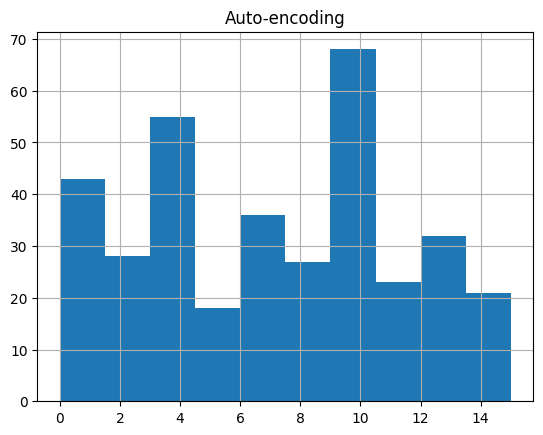

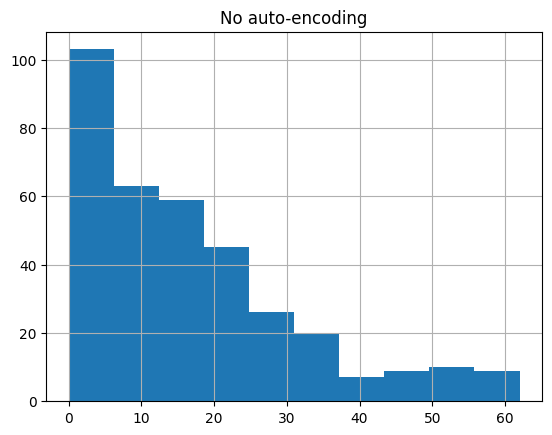

SPCA
coverage auto-encoding: 343, (0.9772079772079773)
coverage no auto-encoding: 350, (0.9971509971509972)
# rows added in subgroups: 1 (0.002849002849002849)
# rows no longer in subgroups: 8, (0.022792022792022793)
average subgroup size auto encoded: 24.8
average subgroup size no auto encoding: 59.24
WRACC auto-encoding: Max: 0.05836803272700707, Mean: 0.013273431222149164
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.043401271093578775


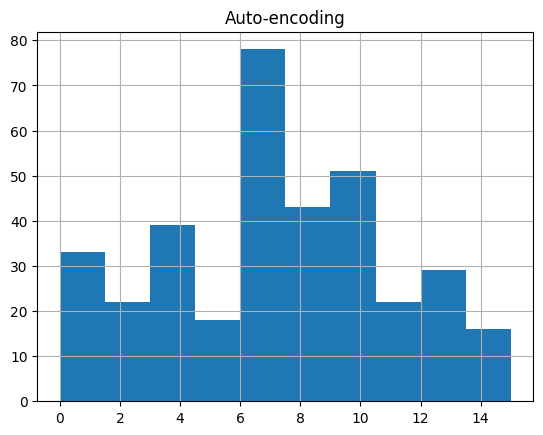

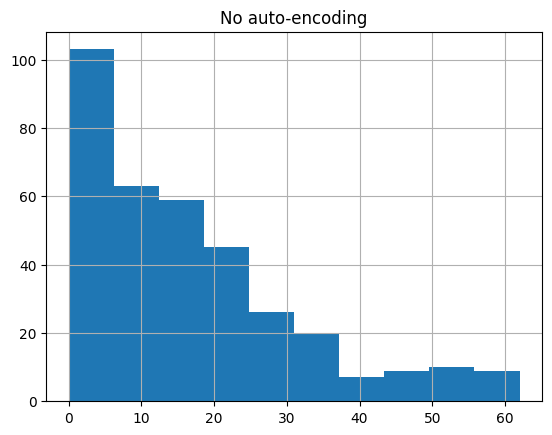

Arrhythmia :    

coverage auto-encoding: 395, (0.9404761904761905)
coverage no auto-encoding: 296, (0.7047619047619048)
# rows added in subgroups: 108 (0.2571428571428571)
# rows no longer in subgroups: 9, (0.02142857142857143)
average subgroup size auto encoded: 22.59
average subgroup size no auto encoding: 97.65
WRACC auto-encoding: Max: 0.06047619047619049, Mean: 0.009497619047619046
WRACC no auto-encoding: Max: 0.06554421768707483, Mean: 0.05814812925170067


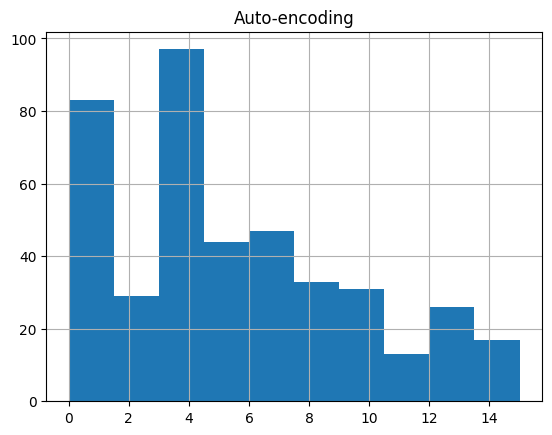

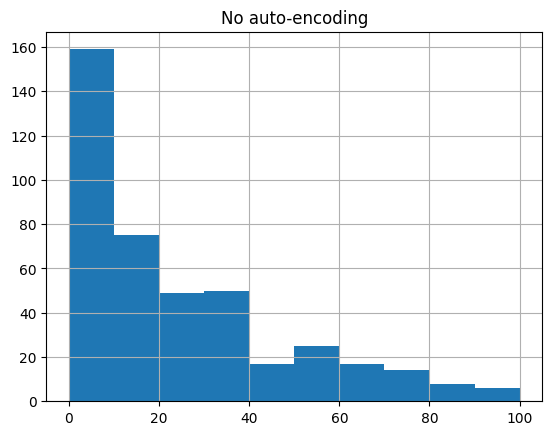

auto_encoder
coverage auto-encoding: 395, (0.9404761904761905)
coverage no auto-encoding: 296, (0.7047619047619048)
# rows added in subgroups: 108 (0.2571428571428571)
# rows no longer in subgroups: 9, (0.02142857142857143)
average subgroup size auto encoded: 22.59
average subgroup size no auto encoding: 97.65
WRACC auto-encoding: Max: 0.06047619047619049, Mean: 0.009497619047619046
WRACC no auto-encoding: Max: 0.06554421768707483, Mean: 0.05814812925170067


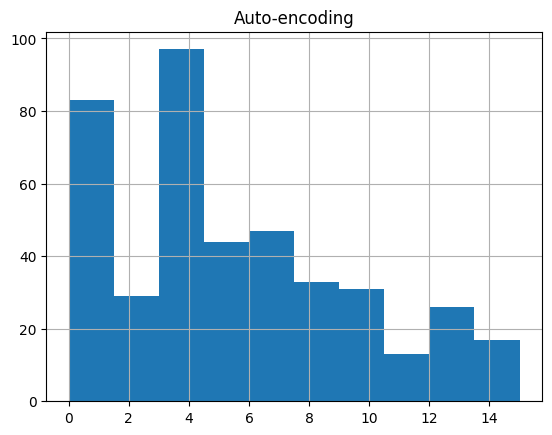

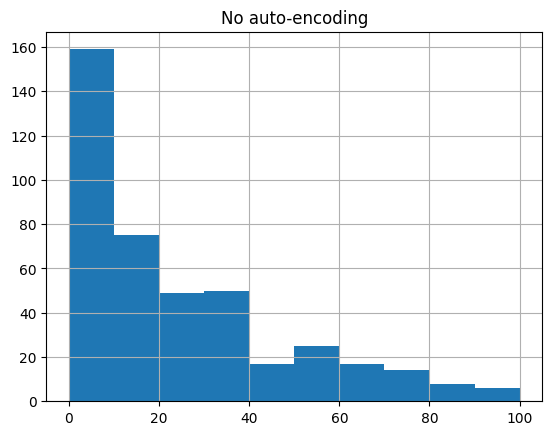

PCA
coverage auto-encoding: 406, (0.9666666666666667)
coverage no auto-encoding: 296, (0.7047619047619048)
# rows added in subgroups: 113 (0.26904761904761904)
# rows no longer in subgroups: 3, (0.007142857142857143)
average subgroup size auto encoded: 21.49
average subgroup size no auto encoding: 97.65
WRACC auto-encoding: Max: 0.06047619047619049, Mean: 0.005991666666666665
WRACC no auto-encoding: Max: 0.06554421768707483, Mean: 0.05814812925170067


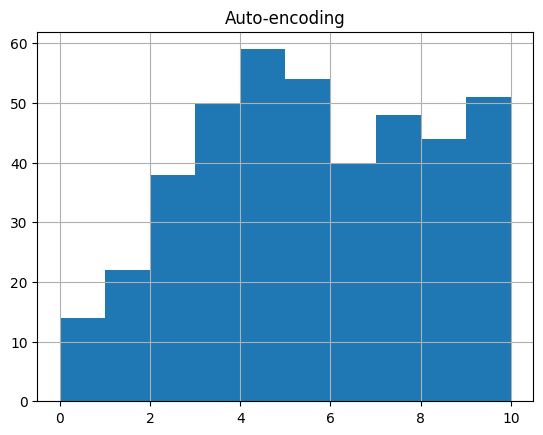

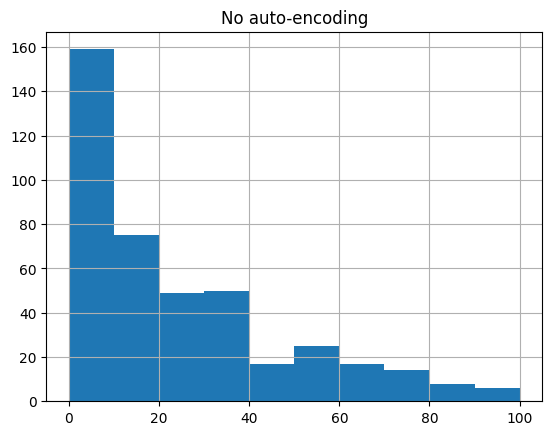

SPCA
coverage auto-encoding: 415, (0.9880952380952381)
coverage no auto-encoding: 296, (0.7047619047619048)
# rows added in subgroups: 120 (0.2857142857142857)
# rows no longer in subgroups: 1, (0.002380952380952381)
average subgroup size auto encoded: 24.02
average subgroup size no auto encoding: 97.65
WRACC auto-encoding: Max: 0.06761904761904762, Mean: 0.005257653061224488
WRACC no auto-encoding: Max: 0.06554421768707483, Mean: 0.05814812925170067


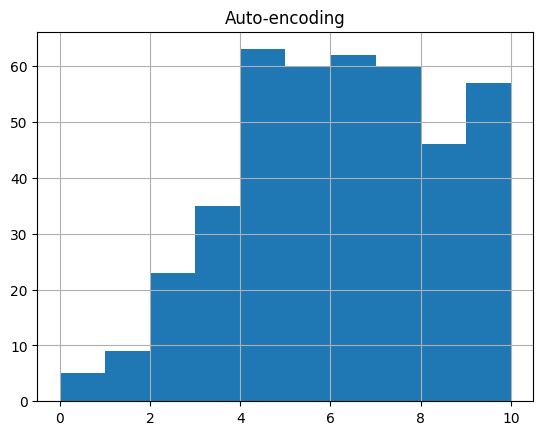

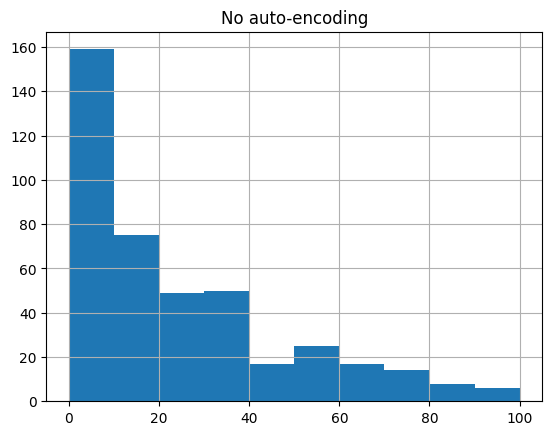

Indoor :    

coverage auto-encoding: 19418, (0.9225579627518053)
coverage no auto-encoding: 8417, (0.3998954770049411)
# rows added in subgroups: 11001 (0.5226624857468644)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 1164.57
average subgroup size no auto encoding: 4176.39
WRACC auto-encoding: Max: 0.08101853958612057, Mean: 0.013708722066707202
WRACC no auto-encoding: Max: 0.10696403189697552, Mean: 0.10639298479188797


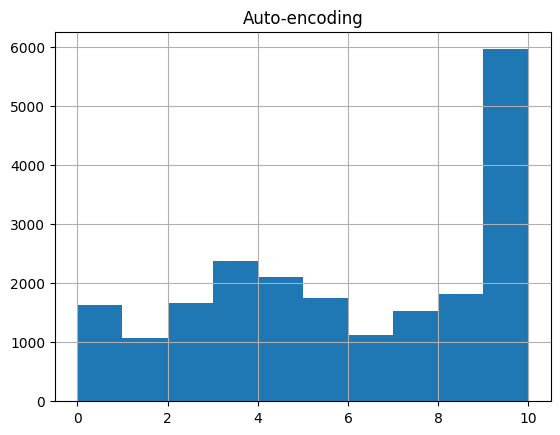

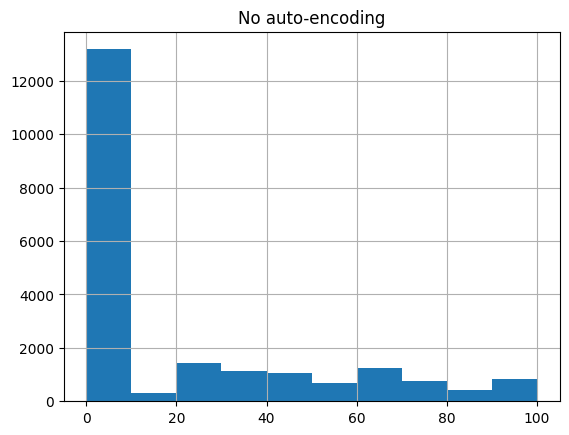

auto_encoder
coverage auto-encoding: 19418, (0.9225579627518053)
coverage no auto-encoding: 8417, (0.3998954770049411)
# rows added in subgroups: 11001 (0.5226624857468644)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 1164.57
average subgroup size no auto encoding: 4176.39
WRACC auto-encoding: Max: 0.08101853958612057, Mean: 0.013708722066707202
WRACC no auto-encoding: Max: 0.10696403189697552, Mean: 0.10639298479188797


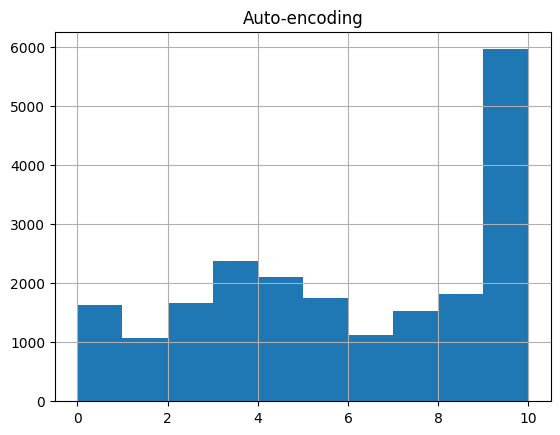

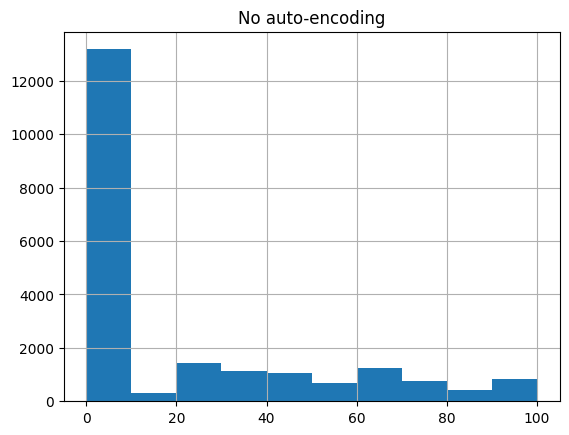

PCA
coverage auto-encoding: 15845, (0.7528031166856708)
coverage no auto-encoding: 8417, (0.3998954770049411)
# rows added in subgroups: 7428 (0.35290763968072975)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 1115.16
average subgroup size no auto encoding: 4176.39
WRACC auto-encoding: Max: 0.10726978901530895, Mean: 0.020435474918887326
WRACC no auto-encoding: Max: 0.10696403189697552, Mean: 0.10639298479188797


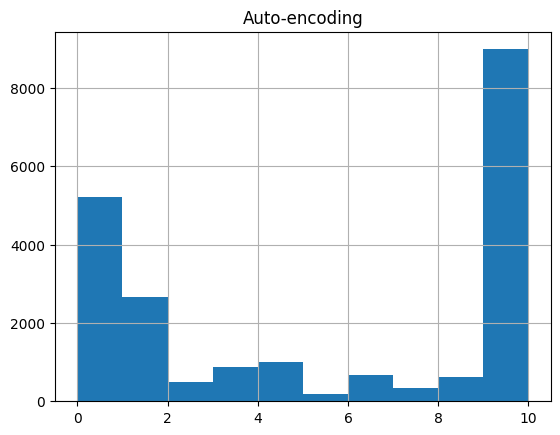

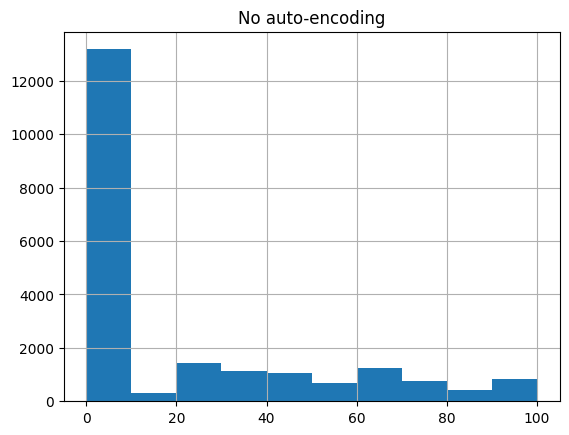

SPCA
coverage auto-encoding: 18146, (0.8621246674268339)
coverage no auto-encoding: 8417, (0.3998954770049411)
# rows added in subgroups: 9739 (0.46270429494488785)
# rows no longer in subgroups: 10, (0.0004751045229950589)
average subgroup size auto encoded: 1104.0
average subgroup size no auto encoding: 4176.39
WRACC auto-encoding: Max: 0.10724430925544784, Mean: 0.01743383460742967
WRACC no auto-encoding: Max: 0.10696403189697552, Mean: 0.10639298479188797


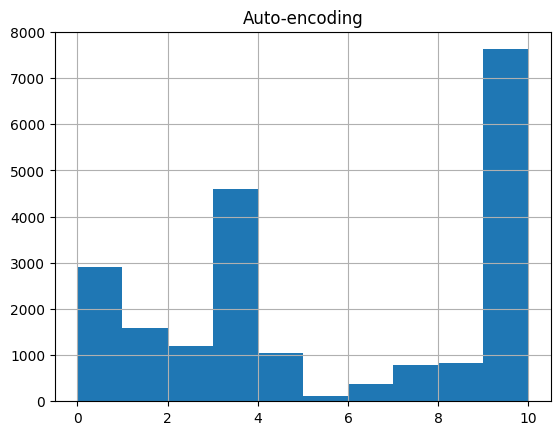

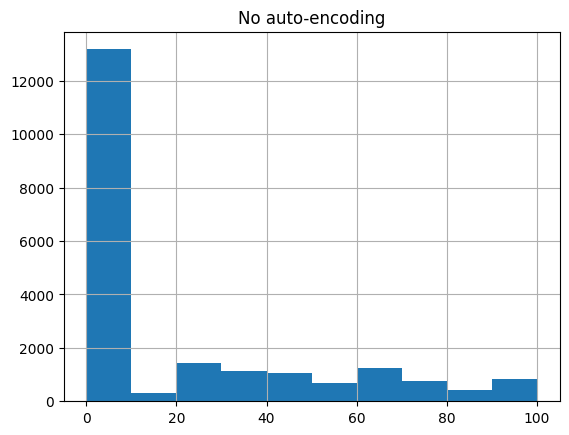

Soybean :    

coverage auto-encoding: 249, (0.9360902255639098)
coverage no auto-encoding: 251, (0.943609022556391)
# rows added in subgroups: 9 (0.03383458646616541)
# rows no longer in subgroups: 11, (0.041353383458646614)
average subgroup size auto encoded: 17.49
average subgroup size no auto encoding: 134.99
WRACC auto-encoding: Max: 0.10379331788116908, Mean: 0.01871106337271751
WRACC no auto-encoding: Max: 0.24068630222171972, Mean: 0.16175730680083666


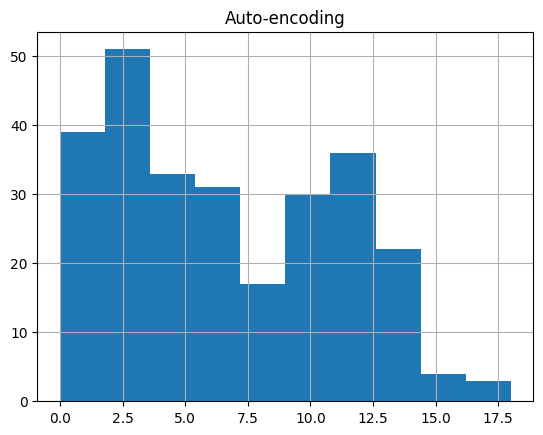

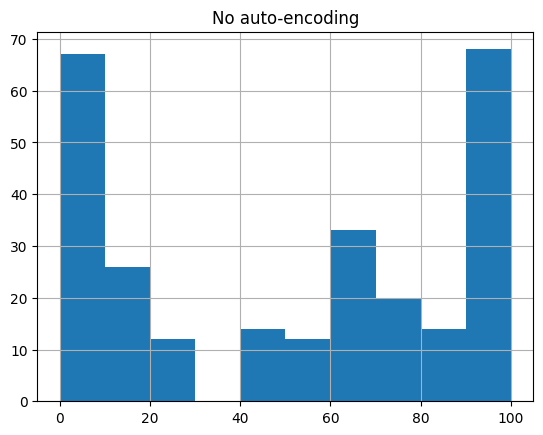

auto_encoder
coverage auto-encoding: 249, (0.9360902255639098)
coverage no auto-encoding: 251, (0.943609022556391)
# rows added in subgroups: 9 (0.03383458646616541)
# rows no longer in subgroups: 11, (0.041353383458646614)
average subgroup size auto encoded: 17.49
average subgroup size no auto encoding: 134.99
WRACC auto-encoding: Max: 0.10379331788116908, Mean: 0.01871106337271751
WRACC no auto-encoding: Max: 0.24068630222171972, Mean: 0.16175730680083666


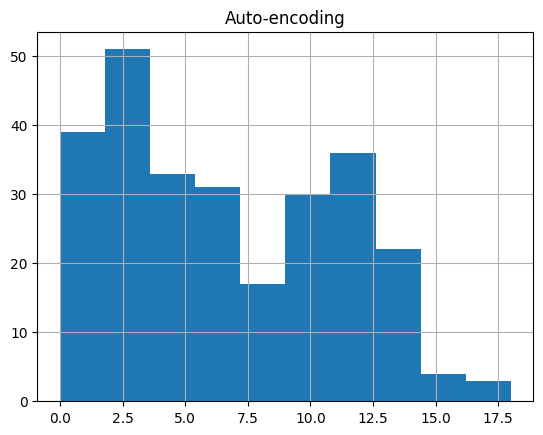

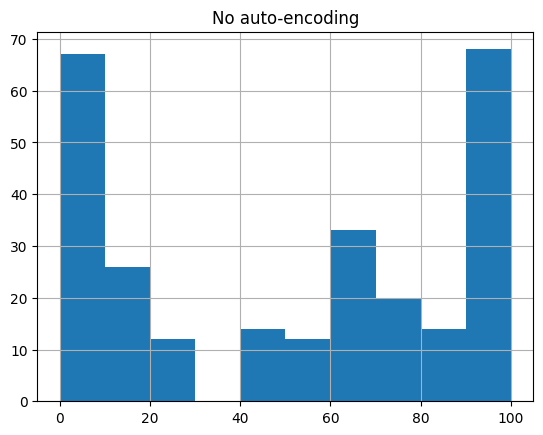

PCA
coverage auto-encoding: 264, (0.9924812030075187)
coverage no auto-encoding: 251, (0.943609022556391)
# rows added in subgroups: 13 (0.04887218045112782)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 16.87
average subgroup size no auto encoding: 134.99
WRACC auto-encoding: Max: 0.06427723443948218, Mean: 0.012125897450392902
WRACC no auto-encoding: Max: 0.24068630222171972, Mean: 0.16175730680083666


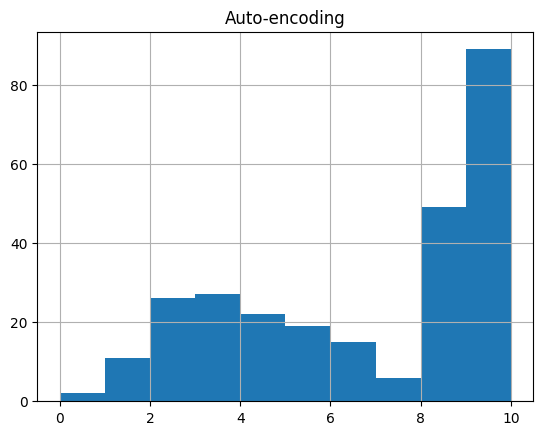

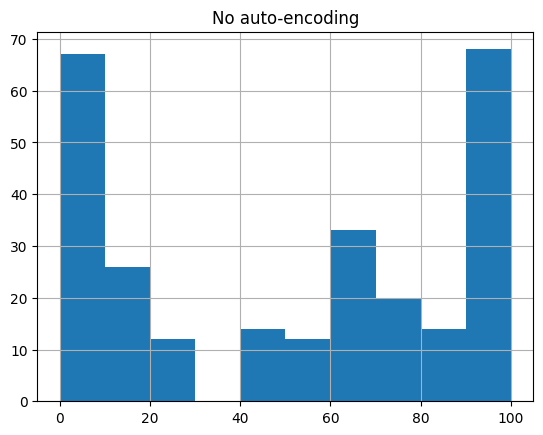

SPCA
coverage auto-encoding: 266, (1.0)
coverage no auto-encoding: 251, (0.943609022556391)
# rows added in subgroups: 15 (0.05639097744360902)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 15.88
average subgroup size no auto encoding: 134.99
WRACC auto-encoding: Max: 0.09811182090564757, Mean: 0.010088473062355137
WRACC no auto-encoding: Max: 0.24068630222171972, Mean: 0.16175730680083666


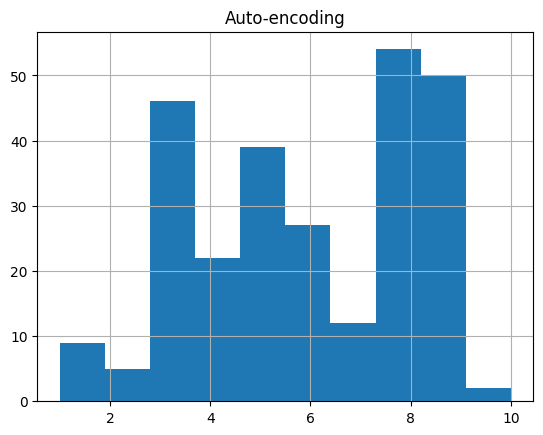

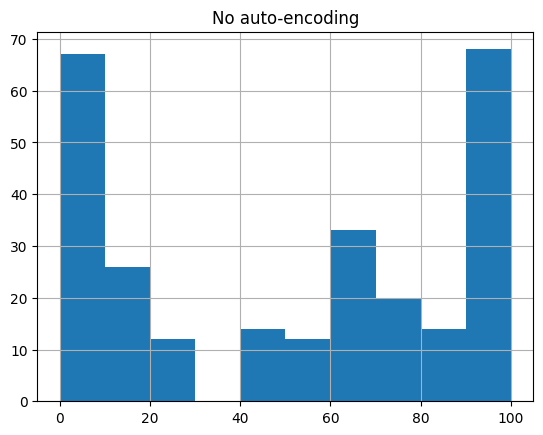

Mushroom :    

coverage auto-encoding: 7751, (0.9540866568193008)
coverage no auto-encoding: 8124, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 373, (0.045913343180699166)
average subgroup size auto encoded: 486.9
average subgroup size no auto encoding: 2105.28
WRACC auto-encoding: Max: 0.07677296827776069, Mean: 0.015498338044893029
WRACC no auto-encoding: Max: 0.1823755424596742, Mean: 0.09028494814860072


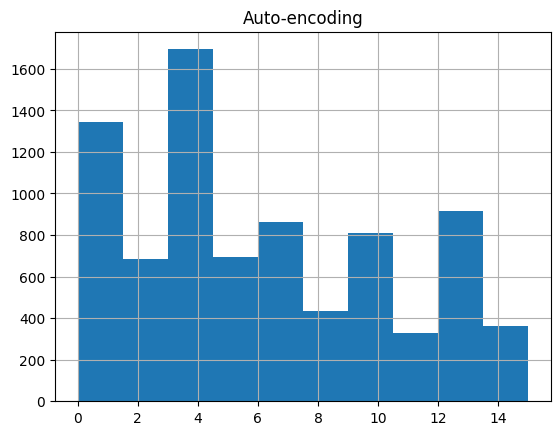

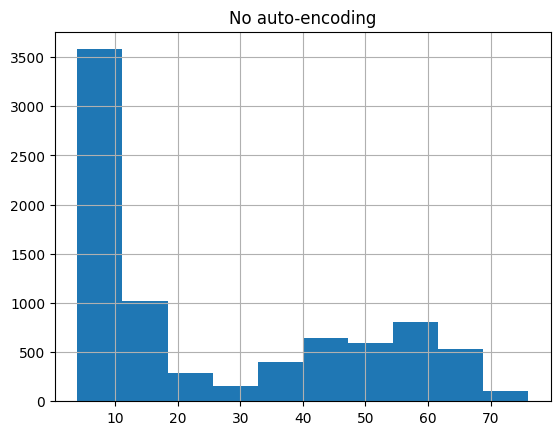

auto_encoder
coverage auto-encoding: 7751, (0.9540866568193008)
coverage no auto-encoding: 8124, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 373, (0.045913343180699166)
average subgroup size auto encoded: 486.9
average subgroup size no auto encoding: 2105.28
WRACC auto-encoding: Max: 0.07677296827776069, Mean: 0.015498338044893029
WRACC no auto-encoding: Max: 0.1823755424596742, Mean: 0.09028494814860072


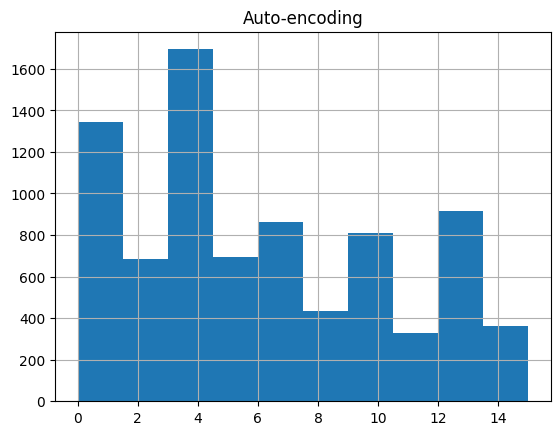

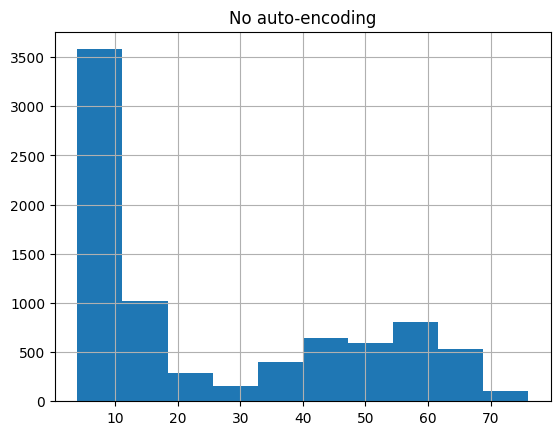

PCA
coverage auto-encoding: 7153, (0.8804775972427376)
coverage no auto-encoding: 8124, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 971, (0.11952240275726243)
average subgroup size auto encoded: 759.22
average subgroup size no auto encoding: 2105.28
WRACC auto-encoding: Max: 0.10354328198496907, Mean: 0.04005249867816932
WRACC no auto-encoding: Max: 0.1823755424596742, Mean: 0.09028494814860072


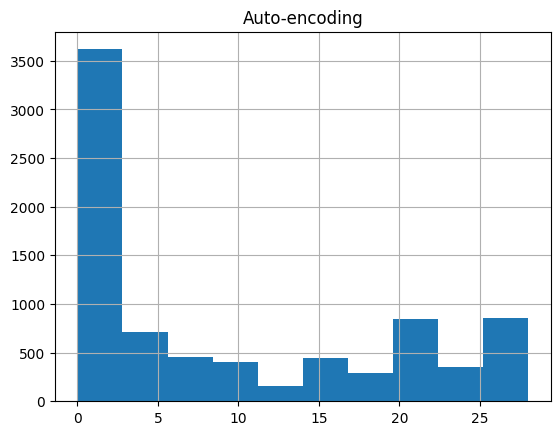

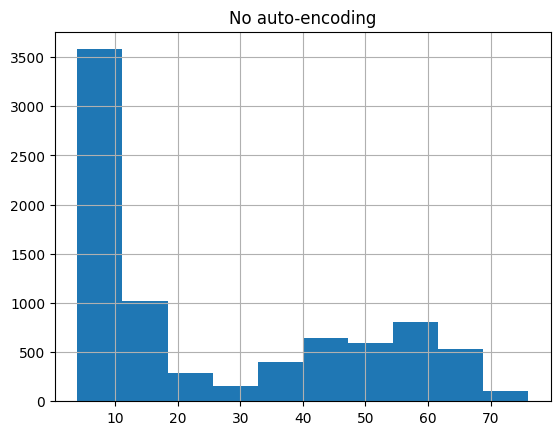

SPCA
coverage auto-encoding: 7150, (0.8801083210241261)
coverage no auto-encoding: 8124, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 974, (0.11989167897587395)
average subgroup size auto encoded: 622.89
average subgroup size no auto encoding: 2105.28
WRACC auto-encoding: Max: 0.10354328198496907, Mean: 0.03152908172949999
WRACC no auto-encoding: Max: 0.1823755424596742, Mean: 0.09028494814860072


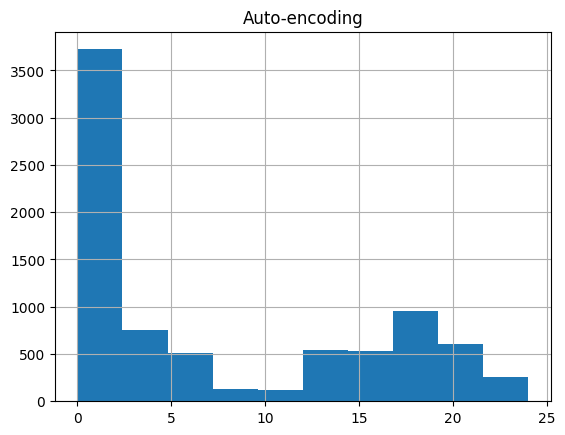

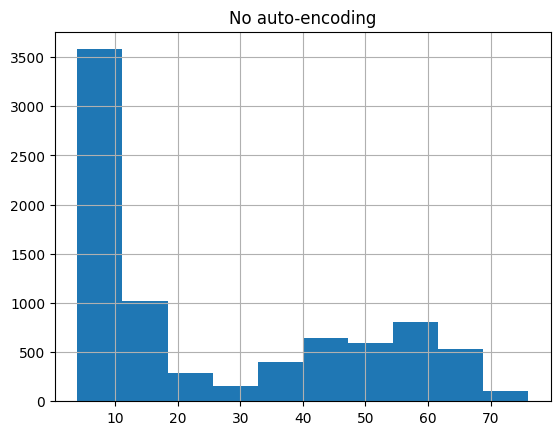

Adult :    

coverage auto-encoding: 48842, (1.0)
coverage no auto-encoding: 41678, (0.8533229597477581)
# rows added in subgroups: 7164 (0.14667704025224193)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 4308.985294117647
average subgroup size no auto encoding: 9164.5
WRACC auto-encoding: Max: 0.027494046419569255, Mean: 2.5618372265606845e-06
WRACC no auto-encoding: Max: 0.06345601575676821, Mean: 0.024945288728229945


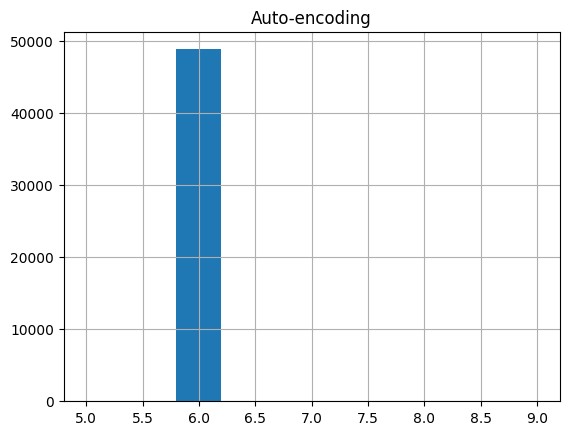

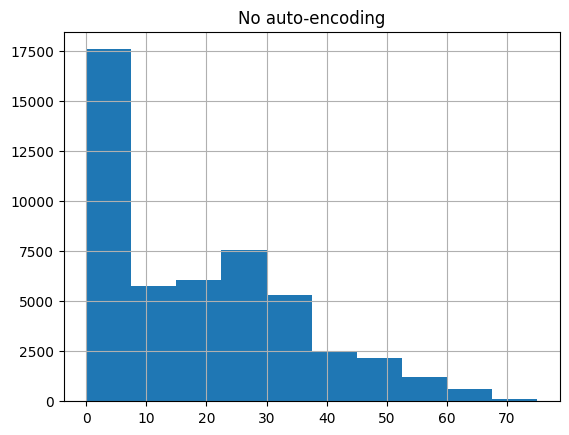

auto_encoder
coverage auto-encoding: 48842, (1.0)
coverage no auto-encoding: 41678, (0.8533229597477581)
# rows added in subgroups: 7164 (0.14667704025224193)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 4308.985294117647
average subgroup size no auto encoding: 9164.5
WRACC auto-encoding: Max: 0.027494046419569255, Mean: 2.5618372265606845e-06
WRACC no auto-encoding: Max: 0.06345601575676821, Mean: 0.024945288728229945


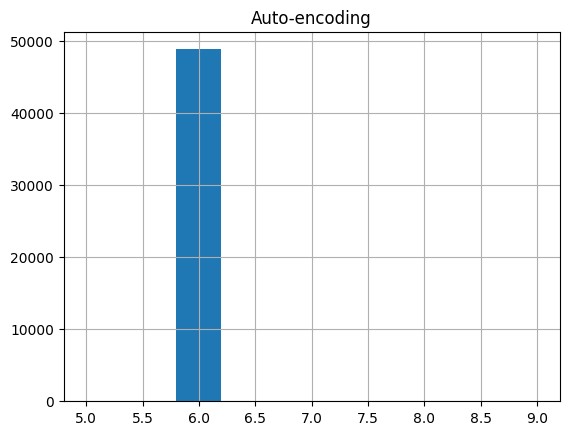

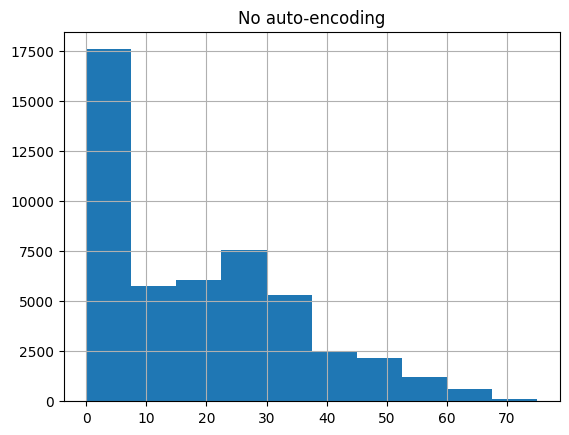

PCA
coverage auto-encoding: 45107, (0.9235289300192457)
coverage no auto-encoding: 41678, (0.8533229597477581)
# rows added in subgroups: 6296 (0.1289054502272634)
# rows no longer in subgroups: 2867, (0.05869947995577577)
average subgroup size auto encoded: 3188.15
average subgroup size no auto encoding: 9164.5
WRACC auto-encoding: Max: 0.048272054321344286, Mean: 0.0067353636858360835
WRACC no auto-encoding: Max: 0.06345601575676821, Mean: 0.024945288728229945


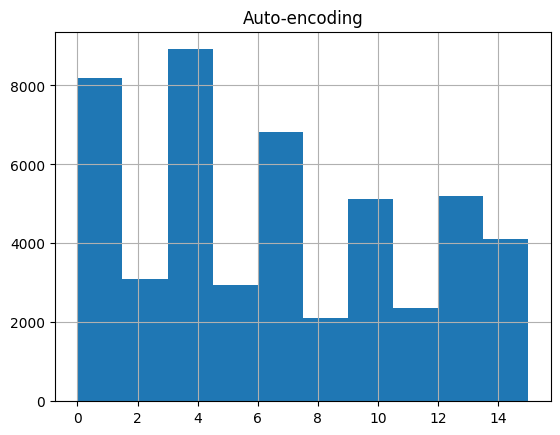

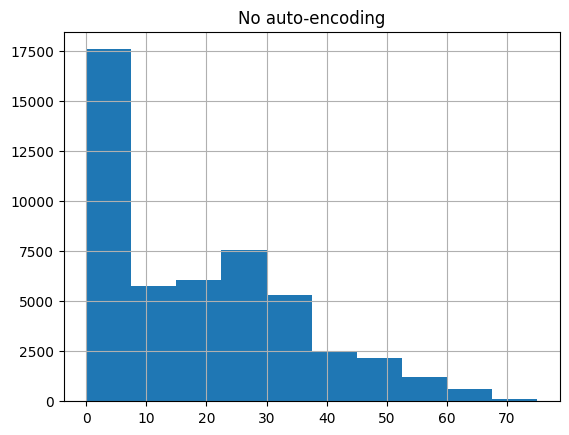

SPCA
coverage auto-encoding: 44482, (0.9107325662339789)
coverage no auto-encoding: 41678, (0.8533229597477581)
# rows added in subgroups: 5318 (0.10888170017607797)
# rows no longer in subgroups: 2514, (0.05147209368985709)
average subgroup size auto encoded: 2975.67
average subgroup size no auto encoding: 9164.5
WRACC auto-encoding: Max: 0.036847460733858105, Mean: 0.0069393533248083865
WRACC no auto-encoding: Max: 0.06345601575676821, Mean: 0.024945288728229945


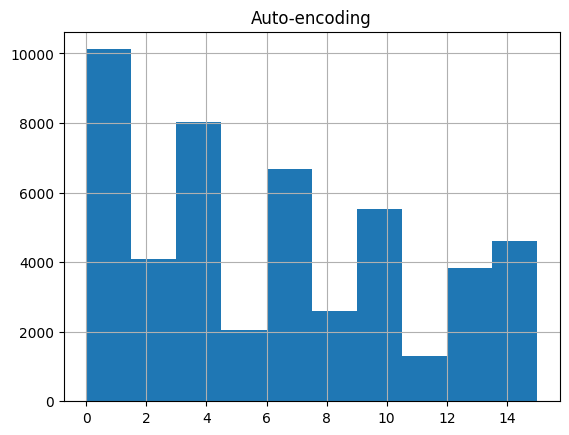

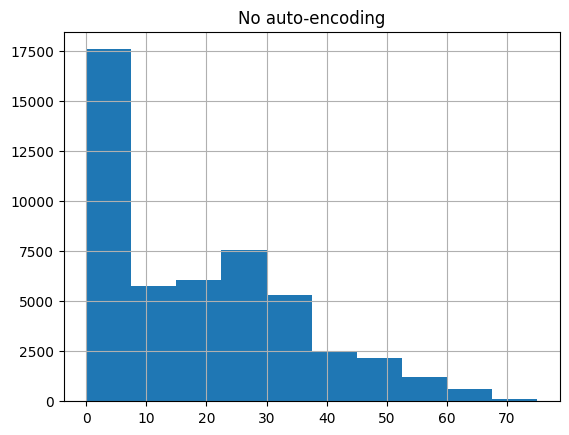

Apriori :    


Ionosphere :    

coverage auto-encoding: 351, (1.0)
coverage no auto-encoding: 351, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 70.2
average subgroup size no auto encoding: 79.87
WRACC auto-encoding: Max: 0.04594930235955876, Mean: -1.27675647831893e-17
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.02507122507122506


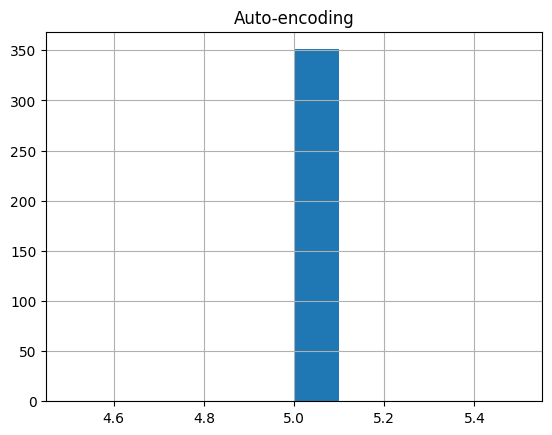

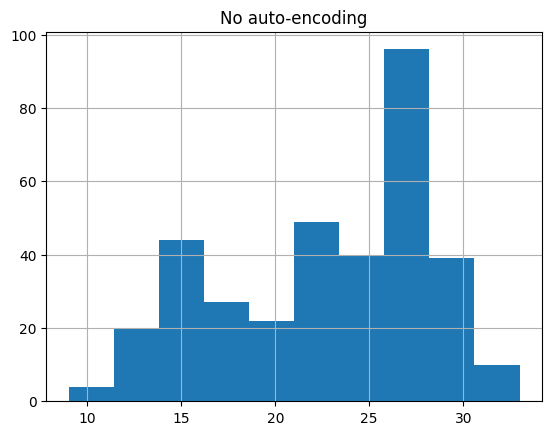

auto_encoder
coverage auto-encoding: 351, (1.0)
coverage no auto-encoding: 351, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 70.2
average subgroup size no auto encoding: 79.87
WRACC auto-encoding: Max: 0.04594930235955876, Mean: -1.27675647831893e-17
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.02507122507122506


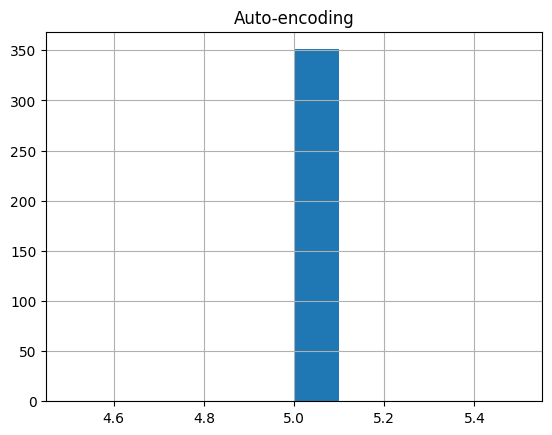

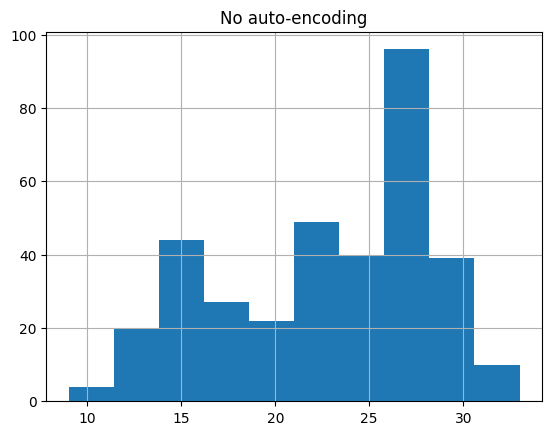

PCA
coverage auto-encoding: 351, (1.0)
coverage no auto-encoding: 351, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 70.2
average subgroup size no auto encoding: 79.87
WRACC auto-encoding: Max: 0.060194316604573, Mean: -1.0547118733938987e-17
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.02507122507122506


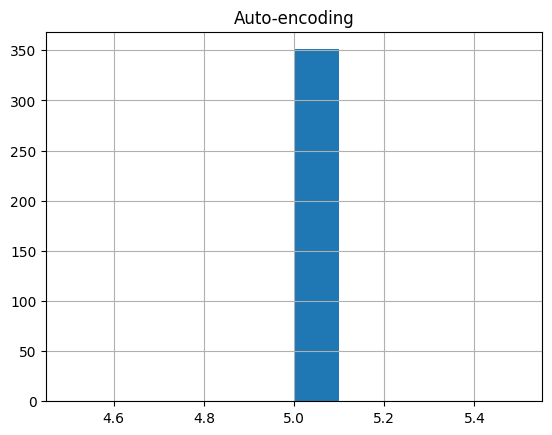

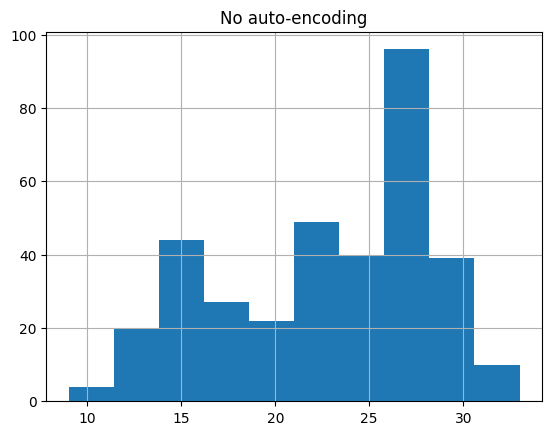

SPCA
coverage auto-encoding: 351, (1.0)
coverage no auto-encoding: 351, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 70.20833333333333
average subgroup size no auto encoding: 79.87
WRACC auto-encoding: Max: 0.05836803272700707, Mean: -1.5219032313062292e-05
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.02507122507122506


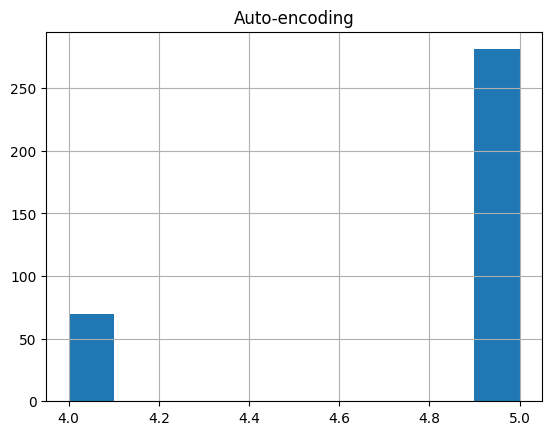

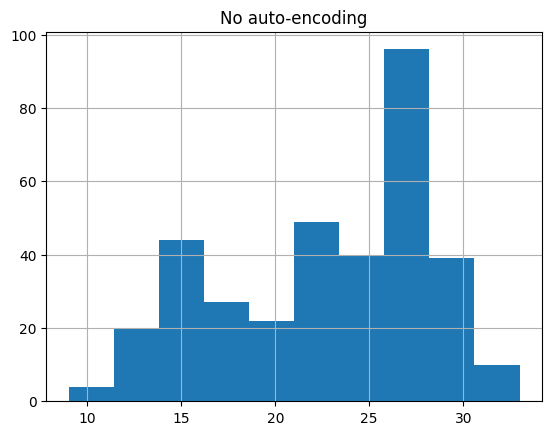

Arrhythmia :    

coverage auto-encoding: 420, (1.0)
coverage no auto-encoding: 418, (0.9952380952380953)
# rows added in subgroups: 2 (0.004761904761904762)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 84.0
average subgroup size no auto encoding: 82.65
WRACC auto-encoding: Max: 0.06047619047619049, Mean: -2.7755575615628915e-18
WRACC no auto-encoding: Max: 0.06346938775510204, Mean: 0.03678741496598639


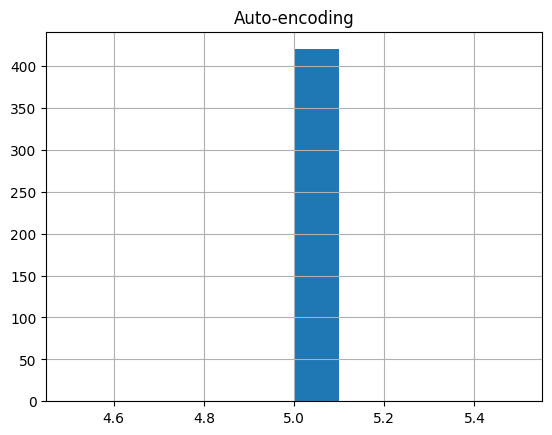

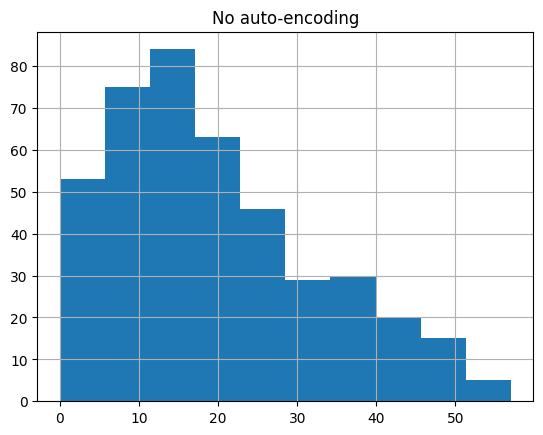

auto_encoder
coverage auto-encoding: 420, (1.0)
coverage no auto-encoding: 418, (0.9952380952380953)
# rows added in subgroups: 2 (0.004761904761904762)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 84.0
average subgroup size no auto encoding: 82.65
WRACC auto-encoding: Max: 0.06047619047619049, Mean: -2.7755575615628915e-18
WRACC no auto-encoding: Max: 0.06346938775510204, Mean: 0.03678741496598639


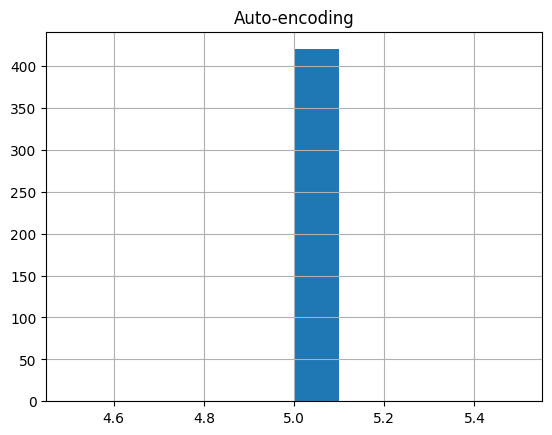

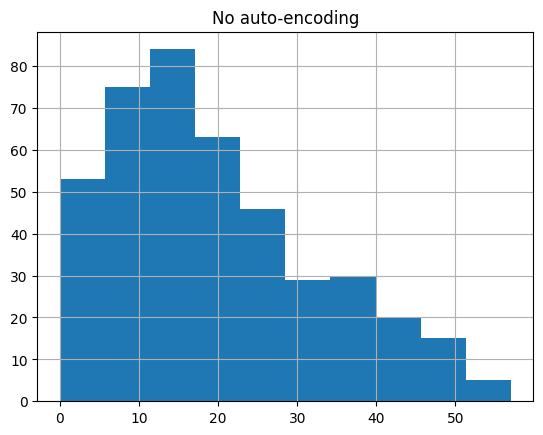

PCA
coverage auto-encoding: 420, (1.0)
coverage no auto-encoding: 418, (0.9952380952380953)
# rows added in subgroups: 2 (0.004761904761904762)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 84.0
average subgroup size no auto encoding: 82.65
WRACC auto-encoding: Max: 0.06047619047619049, Mean: 6.938893903907229e-19
WRACC no auto-encoding: Max: 0.06346938775510204, Mean: 0.03678741496598639


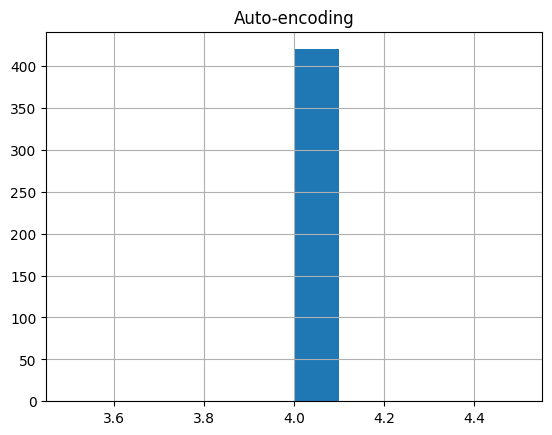

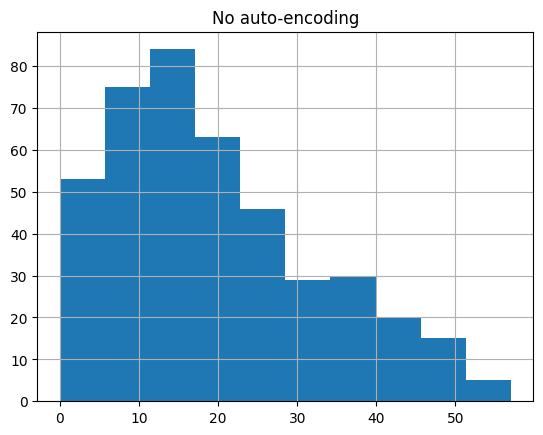

SPCA
coverage auto-encoding: 420, (1.0)
coverage no auto-encoding: 418, (0.9952380952380953)
# rows added in subgroups: 2 (0.004761904761904762)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 84.15789473684211
average subgroup size no auto encoding: 82.65
WRACC auto-encoding: Max: 0.06761904761904762, Mean: 0.0008270676691729302
WRACC no auto-encoding: Max: 0.06346938775510204, Mean: 0.03678741496598639


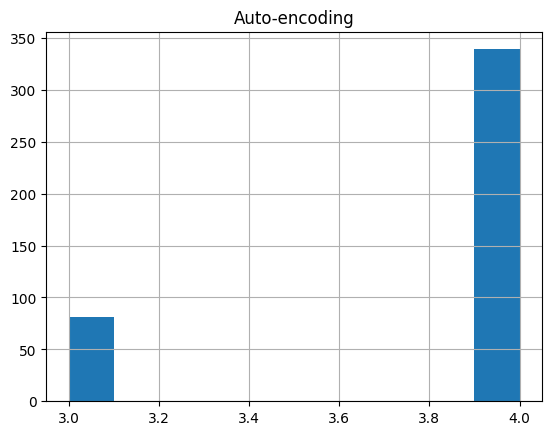

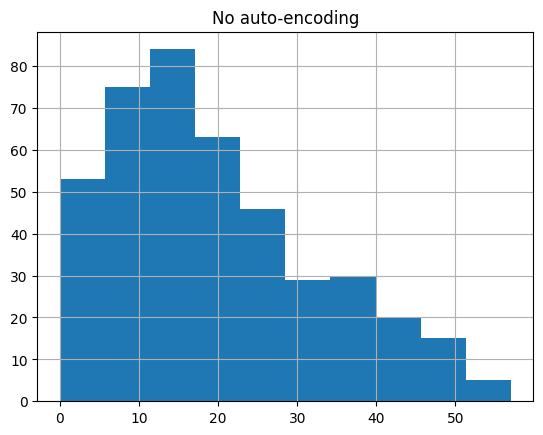

Indoor :    

coverage auto-encoding: 21048, (1.0)
coverage no auto-encoding: 21048, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 4209.6
average subgroup size no auto encoding: 9145.19
WRACC auto-encoding: Max: 0.08101853958612057, Mean: -6.938893903907229e-19
WRACC no auto-encoding: Max: 0.10696403189697552, Mean: 0.05797448567723289


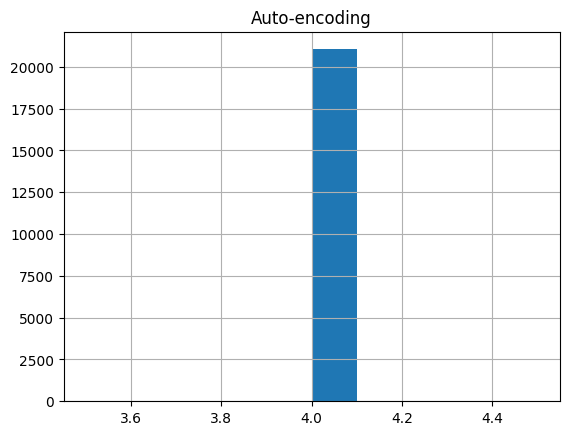

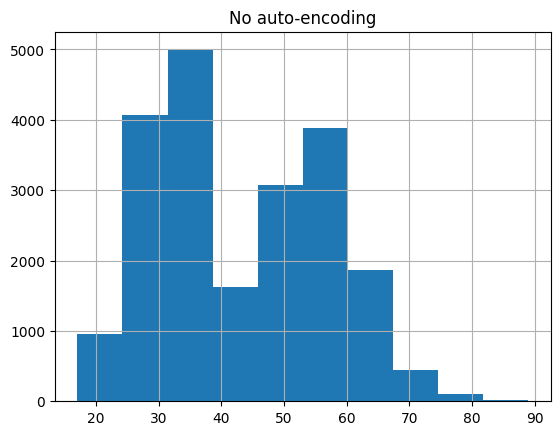

auto_encoder
coverage auto-encoding: 21048, (1.0)
coverage no auto-encoding: 21048, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 4209.6
average subgroup size no auto encoding: 9145.19
WRACC auto-encoding: Max: 0.08101853958612057, Mean: -6.938893903907229e-19
WRACC no auto-encoding: Max: 0.10696403189697552, Mean: 0.05797448567723289


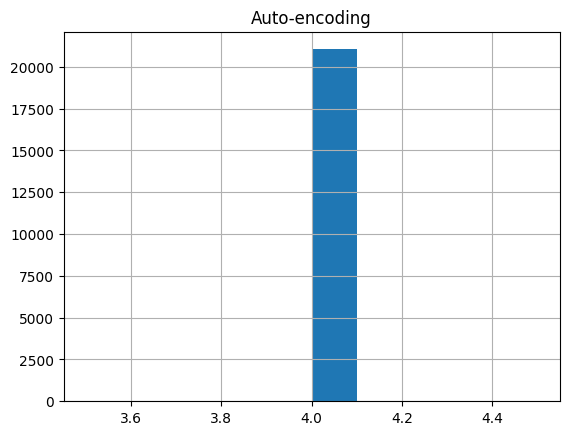

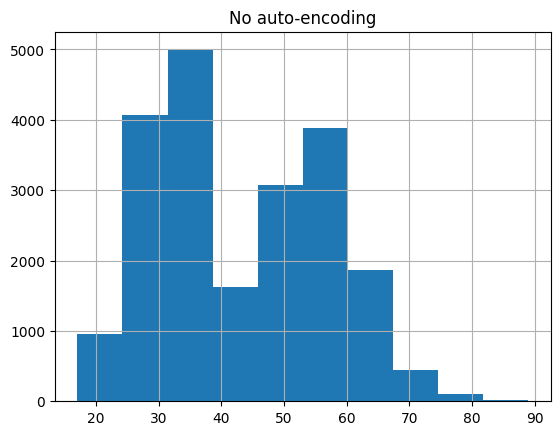

PCA
coverage auto-encoding: 21048, (1.0)
coverage no auto-encoding: 21048, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 4209.6
average subgroup size no auto encoding: 9145.19
WRACC auto-encoding: Max: 0.10726978901530895, Mean: 2.7755575615628915e-18
WRACC no auto-encoding: Max: 0.10696403189697552, Mean: 0.05797448567723289


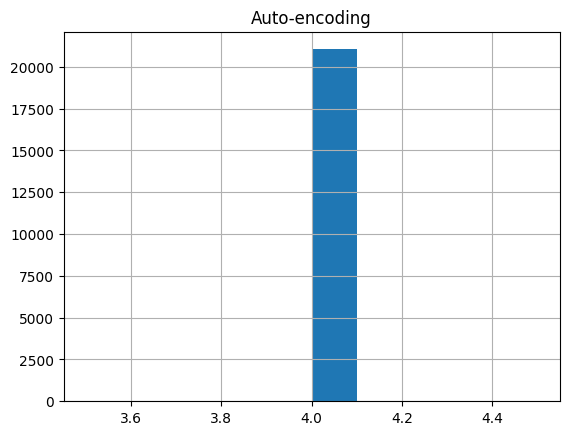

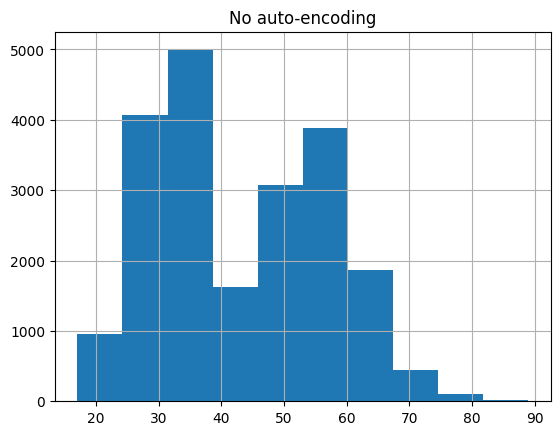

SPCA
coverage auto-encoding: 21048, (1.0)
coverage no auto-encoding: 21048, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 4209.6
average subgroup size no auto encoding: 9145.19
WRACC auto-encoding: Max: 0.10724430925544784, Mean: 2.7755575615628915e-18
WRACC no auto-encoding: Max: 0.10696403189697552, Mean: 0.05797448567723289


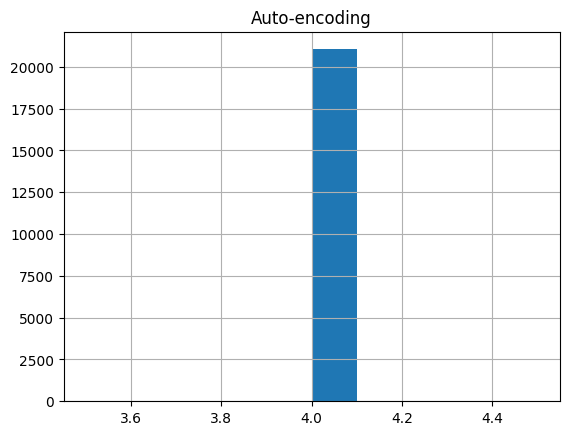

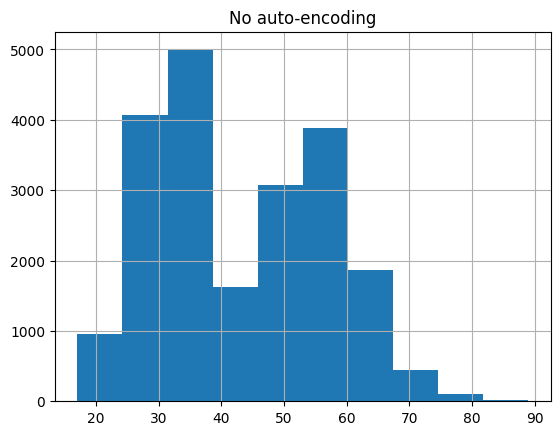

Soybean :    

coverage auto-encoding: 266, (1.0)
coverage no auto-encoding: 266, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 53.2
average subgroup size no auto encoding: 95.97938144329896
WRACC auto-encoding: Max: 0.10379331788116908, Mean: 3.7007434154171884e-18
WRACC no auto-encoding: Max: 0.2223133020521228, Mean: 8.584198644008943e-18


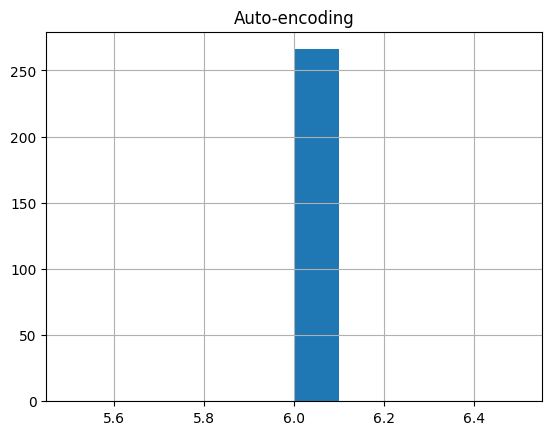

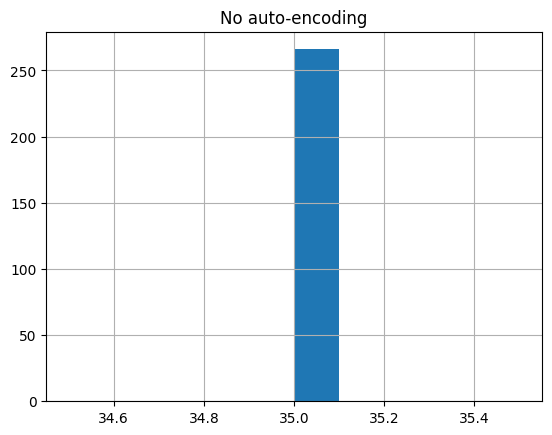

auto_encoder
coverage auto-encoding: 266, (1.0)
coverage no auto-encoding: 266, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 53.2
average subgroup size no auto encoding: 95.97938144329896
WRACC auto-encoding: Max: 0.10379331788116908, Mean: 3.7007434154171884e-18
WRACC no auto-encoding: Max: 0.2223133020521228, Mean: 8.584198644008943e-18


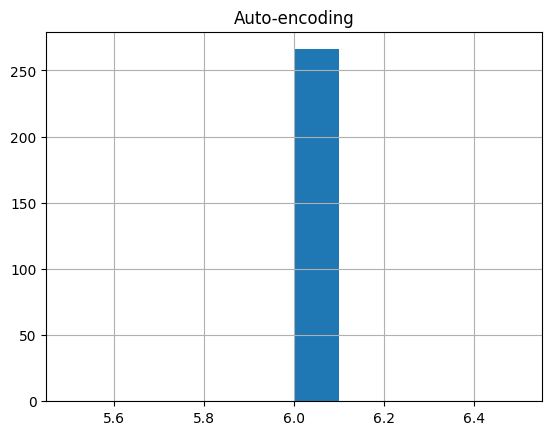

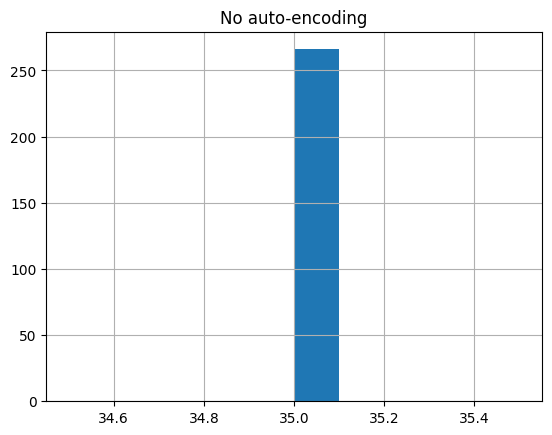

PCA
coverage auto-encoding: 266, (1.0)
coverage no auto-encoding: 266, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 53.2
average subgroup size no auto encoding: 95.97938144329896
WRACC auto-encoding: Max: 0.06427723443948218, Mean: 3.469446951953614e-18
WRACC no auto-encoding: Max: 0.2223133020521228, Mean: 8.584198644008943e-18


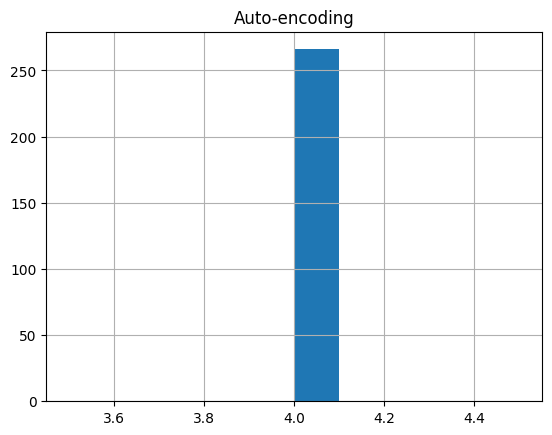

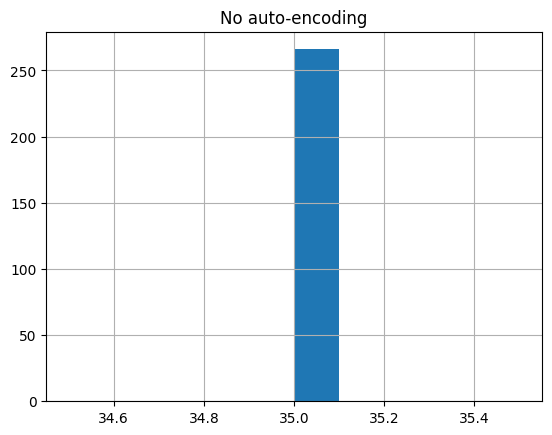

SPCA
coverage auto-encoding: 266, (1.0)
coverage no auto-encoding: 266, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 53.2
average subgroup size no auto encoding: 95.97938144329896
WRACC auto-encoding: Max: 0.09811182090564757, Mean: 7.632783294297952e-18
WRACC no auto-encoding: Max: 0.2223133020521228, Mean: 8.584198644008943e-18


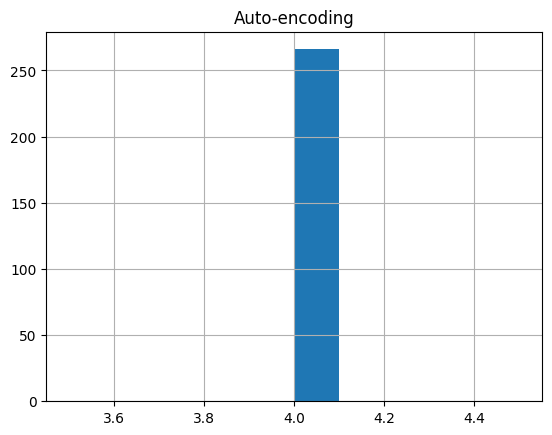

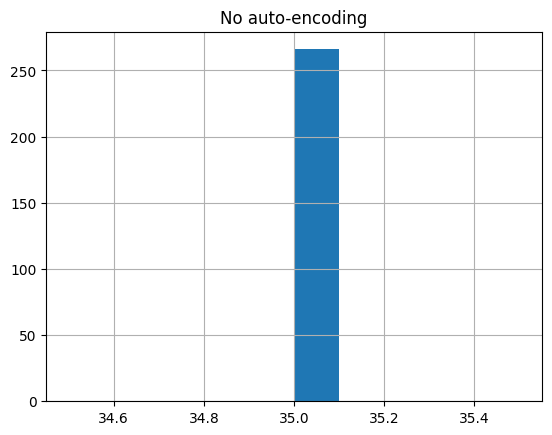

Mushroom :    

coverage auto-encoding: 8124, (1.0)
coverage no auto-encoding: 8124, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 1624.8
average subgroup size no auto encoding: 1297.18
WRACC auto-encoding: Max: 0.07677296827776069, Mean: 2.7755575615628915e-18
WRACC no auto-encoding: Max: 0.13771766569429383, Mean: 0.013828433771858693


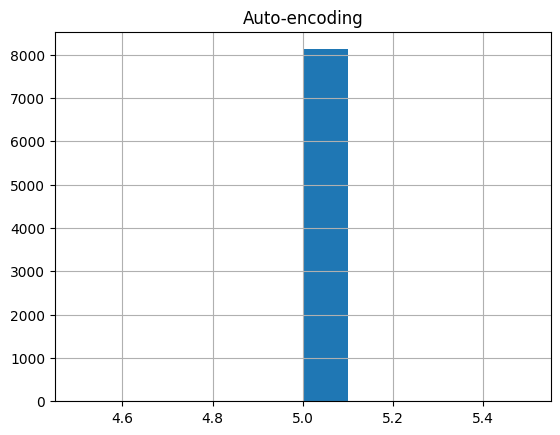

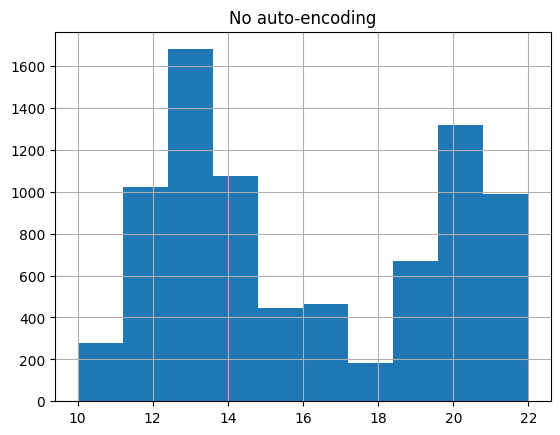

auto_encoder
coverage auto-encoding: 8124, (1.0)
coverage no auto-encoding: 8124, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 1624.8
average subgroup size no auto encoding: 1297.18
WRACC auto-encoding: Max: 0.07677296827776069, Mean: 2.7755575615628915e-18
WRACC no auto-encoding: Max: 0.13771766569429383, Mean: 0.013828433771858693


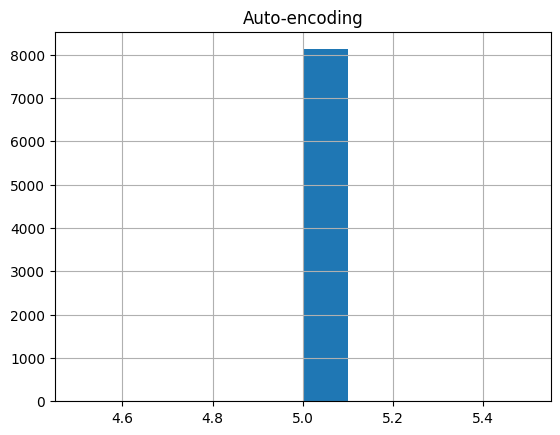

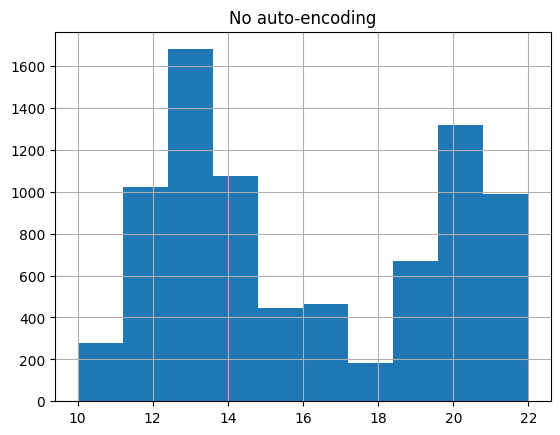

PCA
coverage auto-encoding: 8124, (1.0)
coverage no auto-encoding: 8124, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 1624.8
average subgroup size no auto encoding: 1297.18
WRACC auto-encoding: Max: 0.10354328198496907, Mean: 4.3615904538845435e-18
WRACC no auto-encoding: Max: 0.13771766569429383, Mean: 0.013828433771858693


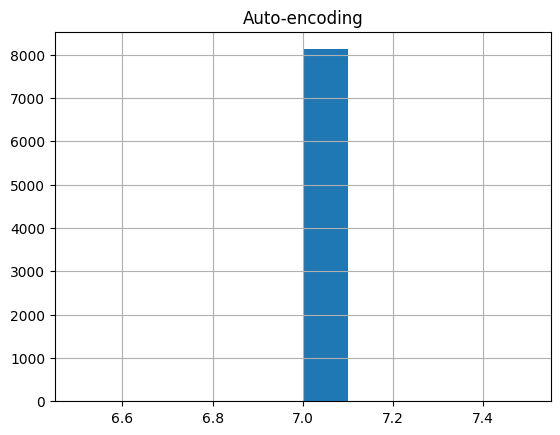

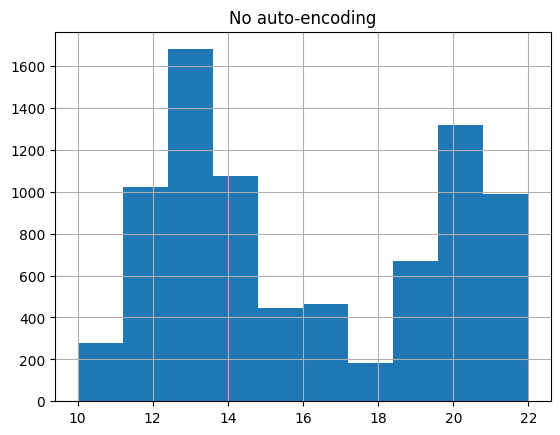

SPCA
coverage auto-encoding: 8124, (1.0)
coverage no auto-encoding: 8124, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 1624.8
average subgroup size no auto encoding: 1297.18
WRACC auto-encoding: Max: 0.10354328198496907, Mean: 1.982541115402065e-18
WRACC no auto-encoding: Max: 0.13771766569429383, Mean: 0.013828433771858693


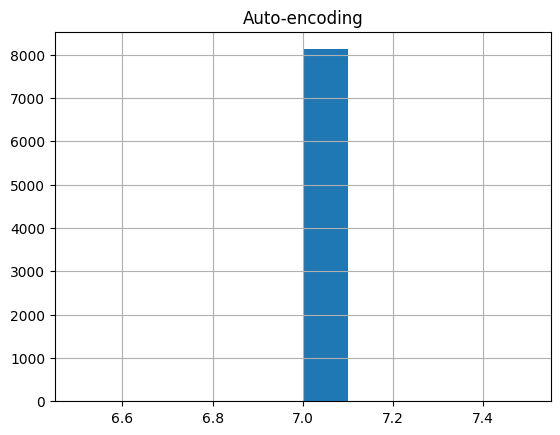

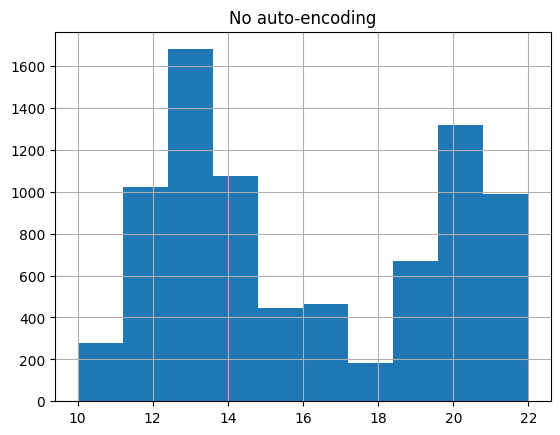

Adult :    

coverage auto-encoding: 48842, (1.0)
coverage no auto-encoding: 48842, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 9768.666666666666
average subgroup size no auto encoding: 3618.39
WRACC auto-encoding: Max: 0.027494046419569255, Mean: 1.61907524424502e-18
WRACC no auto-encoding: Max: 0.06345601575676821, Mean: 0.003816407467903789


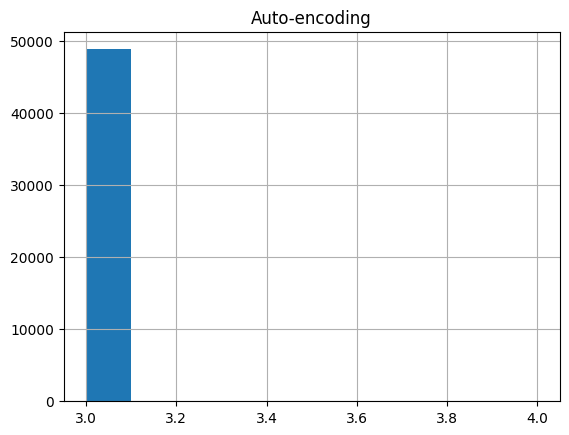

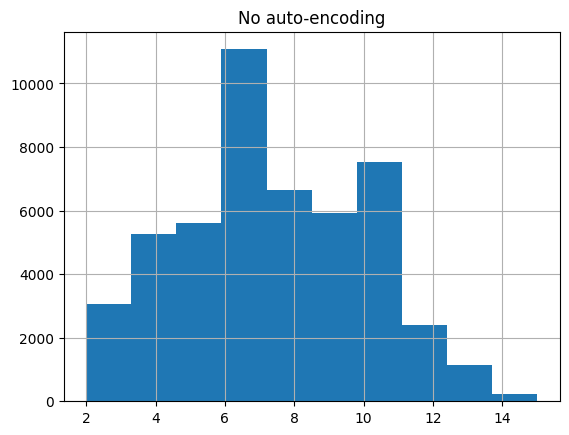

auto_encoder
coverage auto-encoding: 48842, (1.0)
coverage no auto-encoding: 48842, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 9768.666666666666
average subgroup size no auto encoding: 3618.39
WRACC auto-encoding: Max: 0.027494046419569255, Mean: 1.61907524424502e-18
WRACC no auto-encoding: Max: 0.06345601575676821, Mean: 0.003816407467903789


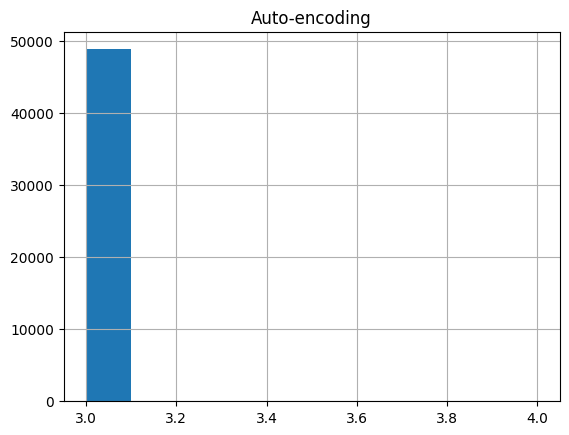

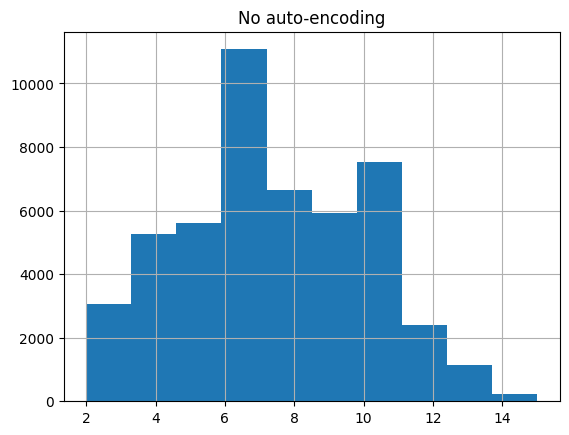

PCA
coverage auto-encoding: 48842, (1.0)
coverage no auto-encoding: 48842, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 9768.4
average subgroup size no auto encoding: 3618.39
WRACC auto-encoding: Max: 0.048272054321344286, Mean: 3.0531133177191805e-18
WRACC no auto-encoding: Max: 0.06345601575676821, Mean: 0.003816407467903789


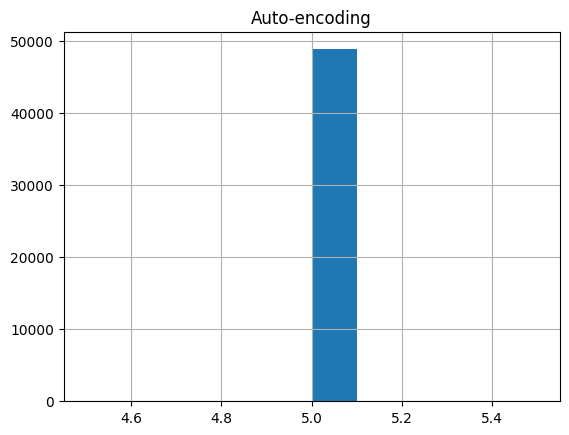

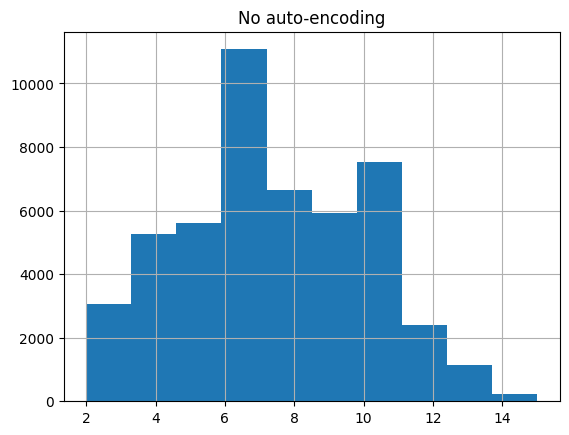

SPCA
coverage auto-encoding: 48842, (1.0)
coverage no auto-encoding: 48842, (1.0)
# rows added in subgroups: 0 (0.0)
# rows no longer in subgroups: 0, (0.0)
average subgroup size auto encoded: 9768.4
average subgroup size no auto encoding: 3618.39
WRACC auto-encoding: Max: 0.036847460733858105, Mean: 3.191891195797325e-18
WRACC no auto-encoding: Max: 0.06345601575676821, Mean: 0.003816407467903789


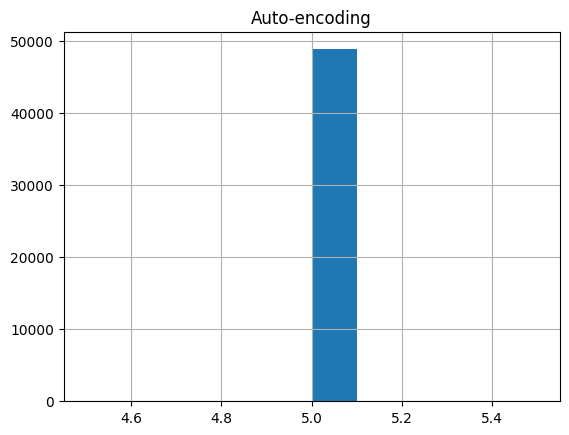

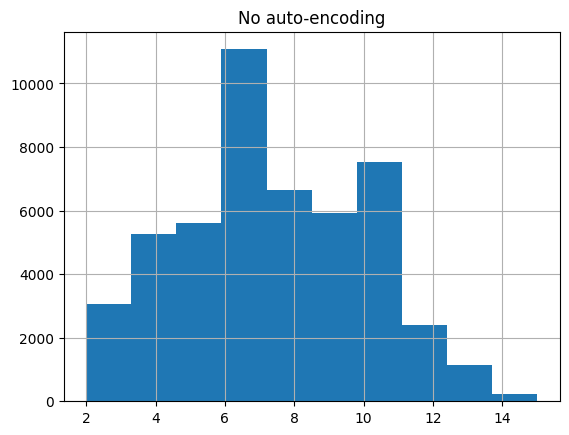

In [39]:
sd_methods = ['Beam Search', 'Depth-First Search', 'Best-First Search', 'Apriori']
output_dataframes = {}
for sd_method in sd_methods:
    print(sd_method, ":    \n\n")
    sd_results_path = r'C:\Users\20193723\OneDrive - TU Eindhoven\Documents\Research Topics in Data Mining\Interpretable-Subgroup-Discovery\results_renamed'
    dct_datasets = ['Ionosphere', 'Arrhythmia', 'Indoor', 'Soybean', 'Mushroom', 'Adult']  # to test <- Remove later
    categorical_datasets = ['Mushroom', 'Adult']
    quality_results = []
    quality_results_columns = []
    for dataset in dct_datasets:
        dataset_quality_results = []
        dataset_quality_columns = []
        #Load dataframes and results
        df_file_name = dataset+'-data-reductions.pkl'
        results_file_name = dataset+'-results.pkl'
        with open(os.path.join(sd_results_path,df_file_name), 'rb') as f:
            dfs_dict =pickle.load(f)
        with open(os.path.join(sd_results_path,results_file_name), 'rb') as f:
            results_dict =pickle.load(f)
        
        if sd_method == 'Beam Search':
            print(dataset, ":    \n")
            en_methods = ['auto_encoder', 'PCA', 'SPCA']
            subgroups_beam_en = [i for i in results_dict['auto_encoder'][sd_method]['results_org'].get_values()]
            subgroups_beam = [i for i in results_dict['vanilla'][sd_method]['results_org'].get_values()]
            output_en, output = calc_result_bs(dfs_dict['auto_encoder'], dfs_dict['vanilla'], subgroups_beam_en, subgroups_beam)
            dataset_quality_results+=output
            dataset_quality_columns += ['coverage', 'coverage_prop', 'avg_size', 'max_wracc', 'avg_wracc']
            for en_method in en_methods:
                print(en_method)
                subgroups_beam_en = [i for i in results_dict[en_method][sd_method]['results_org'].get_values()]
                subgroups_beam = [i for i in results_dict['vanilla'][sd_method]['results_org'].get_values()]
                output_en, output = calc_result_bs(dfs_dict[en_method], dfs_dict['vanilla'], subgroups_beam_en, subgroups_beam)
                dataset_quality_results+=output_en
                dataset_quality_columns += ['coverage_'+en_method, 'coverage_pop_'+en_method, 'added_'+en_method, 'added_prop_'+en_method, 'removed_'+en_method, 'removed_prop_'+en_method, 'avg_size_'+en_method, 'max_wracc_'+en_method, 'avg_wracc_'+en_method]
        
        
        if sd_method != 'Beam Search':
            print(dataset, ":    \n")
            en_methods = ['auto_encoder', 'PCA', 'SPCA']
            output_en, output = calc_result_ps(dfs_dict['auto_encoder'], dfs_dict['vanilla'], results_dict['auto_encoder'][sd_method]['results_org'], results_dict['vanilla'][sd_method]['results_org'])
            dataset_quality_results+=output
            dataset_quality_columns += ['coverage', 'coverage_prop', 'avg_size', 'max_wracc', 'avg_wracc']
            for en_method in en_methods:
                print(en_method)
                output_en, output = calc_result_ps(dfs_dict[en_method], dfs_dict['vanilla'], results_dict[en_method][sd_method]['results_org'], results_dict['vanilla'][sd_method]['results_org'])
                dataset_quality_results+=output_en
                dataset_quality_columns += ['coverage_'+en_method, 'coverage_pop_'+en_method, 'added_'+en_method, 'added_prop_'+en_method, 'removed_'+en_method, 'removed_prop_'+en_method, 'avg_size_'+en_method, 'max_wracc_'+en_method, 'avg_wracc_'+en_method]
        
        quality_results.append(dataset_quality_results)
    df = pd.DataFrame(data=quality_results, index=dct_datasets, columns=dataset_quality_columns)
    output_dataframes[sd_method] = df
    


In [3]:
calc_result_ps(dfs_dict['auto_encoder'], dfs_dict['vanilla'], results_dict['auto_encoder'][sd_method]['results_org'], results_dict['vanilla'][sd_method]['results_org'])

NameError: name 'dfs_dict' is not defined